In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [4]:
(190**4 - 120/0.3)*1780

2319713088000.0

In [691]:
test_data[['pred_Xmin_true','pred_Ymin_true', 'pred_Xmax_true', 'pred_Ymax_true']].to_csv('submission17.csv', header = False)

In [120]:
test_data[['Xmin_true','Ymin_true', 'Xmax_true', 'Ymax_true']].to_csv('submission29.csv', header = False)

In [200]:
ttest_data[['itemId', 'Xmin_bordpred','Ymin_bord', 'Xmax_bord', 'ymax']].to_csv('submission43.csv', header = False, index = False)

In [438]:
datta.to_csv('submission40data1.csv')

In [439]:
ttest_data.to_csv('submission40testdata1.csv')

In [10]:
test_data.to_csv('submission21.csv', header = False)

In [256]:
sub5.to_csv('submission26.csv', header = False)

In [119]:
sub5[['itemId','Xmin', 'Ymin_true', 'Xmax_true', 'Ymax_true']].to_csv('submission20.csv', header = False, index = False)

In [121]:
sub15.to_csv('submission21.csv', header = False)

In [2]:
def area(box):
    return (box[2] - box[0]) * (box[3] - box[1])


def intersection_over_union(boxes):
    assert(len(boxes) == 8)
    boxA = boxes[:4].values
    boxB = boxes[4:].values
    
    boxAArea = area(boxA)
    boxBArea = area(boxB)
    
    if (boxAArea == 0 or boxBArea == 0):
        return 0
        
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)

    
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

In [3]:
votes = pd.read_csv("train_data.csv")

In [4]:
answers = pd.read_csv("train_answers.csv")

In [13]:
data = votes.merge(answers, on=["itemId"])

In [472]:
quorum = votes.groupby("itemId")[['Xmin','Ymin', 'Xmax', 'Ymax']].mean().reset_index()

In [105]:
data = quorum.merge(answers, on=["itemId"])

In [14]:
data["iou"] = data[['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [122]:
quorum[['Xmin_bord','Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5860265453209783

In [15]:
data["iou"].mean()

0.4528736712170044

In [17]:
datta = pd.read_csv('submission38data1.csv', names = ['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true',
       'Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord', 'true_square',
       'weight', 'height', 'iou', 'Xmin_bordpred', 'Ymin_bordpred',
       'Xmax_bordpred', 'Ymax_bordpred'])
ttest_data = pd.read_csv('submission38testdata1.csv', names = ['itemId', 'Xmax_bord', 'Xmin_bord', 'Ymax_bord', 
                                                               'Ymin_bord', 'Xmin_bordpred', 'Ymin_bordpred',
       'Xmax_bordpred', 'Ymax_bordpred'])

In [23]:
ttest_data.head()

,itemId,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,Xmin_bordpred,Ymin_bordpred,Xmax_bordpred,Ymax_bordpred
0,18,764,126,1132,634,81.062826,634.759823,727.983231,1129.596077
1,19,119,27,729,559,34.048266,561.416019,120.755843,731.015718
2,33,414,21,652,380,31.198899,386.368807,398.479997,654.860166
3,62,639,35,1262,824,37.847423,820.564126,610.303504,1258.170386
4,114,216,41,780,570,40.696790,572.173110,212.075311,781.456409


In [19]:
datta.head()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,true_square,weight,height,iou,Xmin_bordpred,Ymin_bordpred,Xmax_bordpred,Ymax_bordpred
81,3019,276,764,405,1001,641,117,1089,628,30573,129,237,0.126563,76.788776,628.892319,612.186380,1087.067651
263,10326,49,562,230,704,377,15,846,382,25702,181,142,0.153017,28.349532,388.324642,363.646798,846.732596
72,2757,233,698,622,920,470,70,1169,780,86358,389,222,0.158925,54.468732,777.535761,451.200514,1166.190303
426,17191,176,1084,263,1199,360,62,1222,1045,10005,87,115,0.189683,50.669575,1036.683869,347.642355,1218.609060
419,16891,202,986,345,1120,471,133,1177,902,19162,143,134,0.206154,84.387088,896.841683,452.141952,1174.102568


In [ ]:
for k in votes.groupby("itemId"):
    print(k[1][['Xmin','Ymin', 'Xmax', 'Ymax']])

In [56]:
votes.iloc[:6][['Xmin','Ymin', 'Xmax', 'Ymax']]/1000

,Xmin,Ymin,Xmax,Ymax
0,0.062,0.656,0.276,0.803
1,0.184,0.662,0.235,0.740
2,0.063,0.648,0.272,0.830
3,0.111,0.637,0.253,0.831
4,0.060,0.651,0.242,0.819
5,0.039,0.649,0.249,0.825


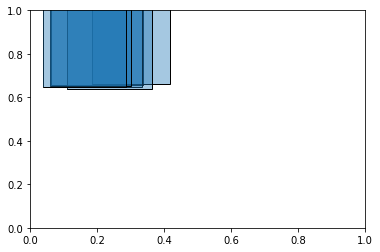

In [78]:
plt.figure()
ax = plt.gca()
for a in (votes.iloc[:6][['Xmin','Ymin', 'Xmax', 'Ymax']]/1000).iterrows():
    ax.add_patch(patches.Rectangle((a[1].Xmin, a[1].Ymin), a[1].Xmax, a[1].Ymax, alpha = 1, fill = None))
    ax.add_patch(patches.Rectangle((a[1].Xmin, a[1].Ymin), a[1].Xmax, a[1].Ymax, alpha = 0.4))

#ax.add_patch(patches.Rectangle((0.047, 0.65), 0.213, 0.812, alpha = 1, fill = None))
#ax.add_patch(patches.Rectangle((0.047, 0.65), 0.213, 0.812, alpha = 0.7, color = 'red'))

plt.show()

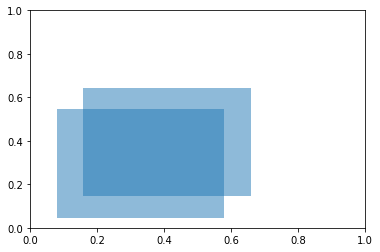

In [54]:
#fig, ax = plt.subplots(1)
plt.figure()
ax = plt.gca()
rect = patches.Rectangle((0.079, 0.0447), 0.500, 0.500, alpha = 0.5)
rect1 = patches.Rectangle((0.159, 0.1447), 0.500, 0.500, alpha = 0.5)

ax.add_patch(rect)
ax.add_patch(rect1)

plt.show()

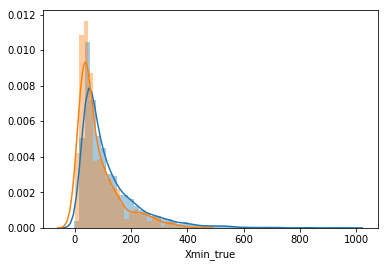

In [357]:
sns.distplot(votes.Xmin)
sns.distplot(answers.Xmin_true);

In [29]:
def overlap(rectA, rectB):
    maxX = min(rectA[2], rectB[2])
    minX = max(rectA[0], rectB[0])
    maxY = min(rectA[3], rectB[3]) 
    minY = max(rectA[1], rectB[1])
    if (maxX - minX > 0) & (maxY - minY > 0):
        return minX, minY, maxX, maxY

In [26]:
overlap(rectA, rectB)

0.579
0.159
0.5447
0.1447
true


(0.159, 0.1447, 0.579, 0.5447)

0.579
0.159
0.5447
0.1447
true


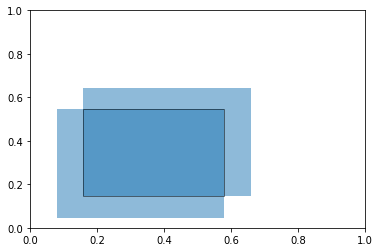

In [27]:
rectA = (0.079, 0.0447, 0.500, 0.500)
rectB = (0.159, 0.1447, 0.500, 0.500)
minX, minY, maxX, maxY = overlap(rectA, rectB)

plt.figure()
ax = plt.gca()
rect = patches.Rectangle((0.079, 0.0447), 0.500, 0.500, alpha = 0.5)
rect1 = patches.Rectangle((0.159, 0.1447), 0.500, 0.500, alpha = 0.5)
rect2 = patches.Rectangle((minX, minY), maxX - minX, maxY - minY, alpha = 0.5, fill = None)


ax.add_patch(rect)
ax.add_patch(rect1)
ax.add_patch(rect2)


plt.show()

In [137]:
test = pd.read_csv('test_data.csv')

In [6]:
test_group = test.groupby(['itemId'])

In [343]:
len(test.itemId.unique())

630

In [71]:
def overlap(df):
    d = {}
    d['Xmax_lap'] = min(df.Xmax)
    #print(maxX)
    d['Xmin_lap'] = max(df.Xmin)
    #print(minX)
    d['Ymax_lap'] = min(df.Ymax) 
    d['Ymin_lap'] = max(df.Ymin)
    #if (maxX - minX > 0) & (maxY - minY > 0):
    return pd.Series(d, index=['Xmax_lap', 'Xmin_lap', 'Ymax_lap', 'Ymin_lap'])
    #return 0

In [5]:
def maxarea(df):
    d = {}
    d['Xmax_bord'] = max(df.Xmax)
    #print(maxX)
    d['Xmin_bord'] = min(df.Xmin)
    #print(minX)
    d['Ymax_bord'] = max(df.Ymax) 
    d['Ymin_bord'] = min(df.Ymin)
    #if (maxX - minX > 0) & (maxY - minY > 0):
    return pd.Series(d, index=['Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord'])

In [ ]:
def knn(df):
    knn.fit(df.Xmax, )
    

In [113]:
quorum = group.apply(overlap)

In [8]:
#max_area = test_group.apply(maxarea)
test_quorum = test_group.apply(maxarea)
#test_quorum = test_quorum.merge(max_area, on=['itemId'])

In [6]:
zero = pd.read_csv('sample_submit_zero.csv', header = None, index_col = 0)

In [7]:
test_data = pd.DataFrame(test_quorum, index = zero.index)

NameError: name 'test_quorum' is not defined

In [693]:
test_data[['pred_Xmin_true','pred_Ymin_true', 'pred_Xmax_true', 'pred_Ymax_true']].head()

,pred_Xmin_true,pred_Ymin_true,pred_Xmax_true,pred_Ymax_true
0,,,,
18,40.000000,897.500000,221.000000,1085.500000
19,48.000000,794.333333,232.666667,946.000000
33,116.222222,730.888889,715.888889,1191.666667
62,52.000000,410.666667,481.833333,787.833333
114,36.000000,595.800000,282.200000,809.600000


In [242]:
test_data.head()

,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord
0,,,,
18,765,126,1132,634
19,120,27,729,559
33,415,21,652,380
62,640,35,1262,824
114,217,41,780,570


In [695]:
zero.shape

(630, 4)

In [8]:
group = votes.groupby(['itemId'])

In [111]:
group = data.groupby(['itemId'])

In [119]:
quorum  = group.apply(maxarea)

In [120]:
quorum.head()

,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord
itemId,,,,
5,511,151,1331,914
10,427,72,858,559
13,621,46,981,600
30,324,65,491,353
48,163,50,1103,1029


In [99]:
dt = votes.merge(answers, on=["itemId"])

In [133]:
maxarea(dt.groupby(['itemId']).head().iloc[:5,:])

Xmax_bord    276
Xmin_bord     60
Ymax_bord    831
Ymin_bord    637
dtype: int64

In [122]:
dt.groupby(['itemId']).head().iloc[:5,:][['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

0    0.613974
1    0.079069
2    0.598080
3    0.435805
4    0.750206
dtype: float64

In [121]:
quorum = answers.merge(quorum, on=["itemId"])

In [17]:
data = data.merge(quorum, on=["itemId"])

NameError: name 'data' is not defined

In [26]:
data = data[data.Xmax_true - data.Xmin_true > 20]
data = data[data.Ymax_true - data.Ymin_true > 20]

In [138]:
quorum = quorum[quorum.Xmax_true - quorum.Xmin_true > 20]
quorum = quorum[quorum.Ymax_true - quorum.Ymin_true > 20]

In [27]:
data = data[(data.Xmin_true < 300) & (data.Xmin_true > 0)]

In [139]:
quorum = quorum[(quorum.Xmin_true < 300) & (quorum.Xmin_true > 0)]

In [28]:
data = data[data.Ymin_true < 1300]

In [140]:
quorum = quorum[quorum.Ymin_true < 1300]

In [18]:
data['true_square'] = (data.Xmax_true - data.Xmin_true)*(data.Ymax_true - data.Ymin_true)

In [19]:
data = data.sort_values(by=['true_square'])

In [20]:
data = data.iloc[6:]

In [57]:
datta['bord_square'] = (datta.Xmax_bord - datta.Xmin_bord)*(datta.Ymax_bord - datta.Ymin_bord)

In [71]:
ttest_data['bord_square'] = (ttest_data.Xmax_bord - ttest_data.Xmin_bord)*(ttest_data.Ymax_bord - ttest_data.Ymin_bord)

In [59]:
datta['height'] = datta.Xmax_bord - datta.Xmin_bord

In [59]:
ttest_data['height'] = ttest_data.Xmax_bord - ttest_data.Xmin_bord

In [60]:
datta['weight'] = datta.Ymax_bord - datta.Ymin_bord

In [72]:
ttest_data['weight'] = ttest_data.Ymax_bord - ttest_data.Ymin_bord

In [22]:
test_data['bord_square'] = (test_data.Xmax_bord - test_data.Xmin_bord)*(test_data.Ymax_bord - test_data.Ymin_bord)

In [31]:
data["iou"] = data[['Xmin_bord','Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [32]:
data = data.sort_values(by=['iou'])

In [234]:
def minmax(df):
    d = {}
    d['Xmax_bord'] = max(df.Xmax)
    #print(maxX)
    d['Xmin_bord'] = min(df.Xmin)
    #print(minX)
    d['Ymax_bord'] = max(df.Ymax) 
    d['Ymin_bord'] = min(df.Ymin)
    #if (maxX - minX > 0) & (maxY - minY > 0):
    return pd.Series(d, index=['Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord'])

In [235]:
quorum  = group.apply(minmax)

In [236]:
dt = answers.merge(quorum, on=["itemId"])

In [237]:
dt[['Xmin_bord','Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5809800227327834

In [201]:
data[['Xmin_bord','Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5856281099315152

In [389]:
data.shape

(905, 9)

In [22]:
data.head()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,iou
81,3019,276,764,405,1001,641,117,1089,628,0.126563
263,10326,49,562,230,704,377,15,846,382,0.153017
72,2757,233,698,622,920,470,70,1169,780,0.158925
426,17191,176,1084,263,1199,360,62,1222,1045,0.189683
419,16891,202,986,345,1120,471,133,1177,902,0.206154


In [214]:
def draw(df):
    #sample = (df.sample(n=1).iloc[0]/1000)
    #print(sample.Xmin_true[0] - 1)
    rect_lap = patches.Rectangle((sample.Xmin_lap, sample.Ymin_lap), \
                                 sample.Xmax_lap - sample.Xmin_lap, sample.Ymax_lap - sample.Ymin_lap, alpha = 0.5, color = 'red')
    rect_bord = patches.Rectangle((sample.Xmin_bord, sample.Ymin_bord), \
                                 sample.Xmax_bord - sample.Xmin_bord, sample.Ymax_bord - sample.Ymin_bord, alpha = 0.5)
    rect_true = patches.Rectangle((sample.Xmin_true, sample.Ymin_true), \
                                 sample.Xmax_true - sample.Xmin_true, sample.Ymax_true - sample.Ymin_true, \
                                  alpha = 0.5, fill = None)
    plt.figure()
    ax = plt.gca()
    ax.add_patch(rect_lap)
    ax.add_patch(rect_bord)
    ax.add_patch(rect_true)

    

In [474]:
quorum = test.groupby("itemId")[['Xmin','Ymin', 'Xmax', 'Ymax']].mean().reset_index()

In [56]:
quorum.shape

(943, 4)

In [39]:
group = data.groupby("itemId")

In [38]:
data.shape

(5337, 11)

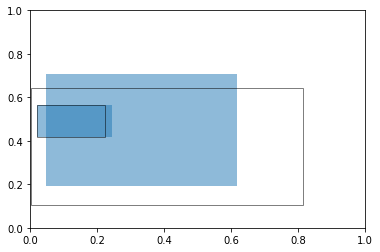

In [520]:
draw(data.iloc[:2], '_bord')

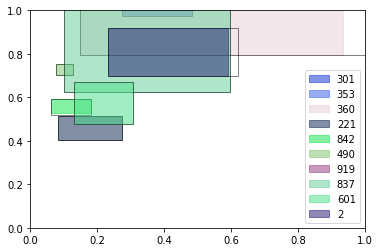

In [386]:
draw(vy.iloc[5:15], '_over')

In [525]:
def draw(df, part = ''):
    colors = [np.random.rand(3) for x in range(df.shape[1])]

    plt.figure()
    ax = plt.gca()
    samples = df
    #print(sample.Xmin_true[0] - 1)
    for i, sample in enumerate(samples.iterrows()):
        sample = sample[1]/1000
        rect_pred = patches.Rectangle((sample['Xmin' + part], sample['Ymin' + part]), \
                                      sample['Xmax' + part] - sample['Xmin' + part], sample['Ymax' + part] - sample['Ymin' + part], \
                                      alpha = 0.5, label=sample.name, color = colors[i])
        rect_true = patches.Rectangle((sample.Xmin_true, sample.Ymin_true), \
                                      sample.Xmax_true - sample.Xmin_true, sample.Ymax_true - sample.Ymin_true, \
                                      alpha = 0.5, fill = None)
        ax.add_patch(rect_pred)
        ax.add_patch(rect_true)
        ax.legend()

    

In [133]:
def random_color():
    rgbl=[255,0,0]
    random.shuffle(rgbl)
    return tuple(rgbl)

In [136]:
import random

In [139]:
[np.random.rand(3) for x in range(vy.shape[1])]

[array([0.96444306, 0.53752116, 0.14525492]),
 array([0.2506341 , 0.24834376, 0.68458349]),
 array([0.18133111, 0.18341874, 0.71050299]),
 array([0.62289965, 0.62677224, 0.68401601]),
 array([0.42676773, 0.43447939, 0.02567123]),
 array([0.25014208, 0.03775027, 0.6213462 ]),
 array([0.31987313, 0.70543009, 0.56584573]),
 array([0.55312122, 0.61792365, 0.42640754]),
 array([0.42424297, 0.02941034, 0.09750184])]

In [376]:
vy.head()

,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmin_bord,Ymin_bord,Xmax_bord,Ymax_bord,iou,bord_square,true_square,x,y,Xmax_over,Ymax_over,Xmin_over,Ymin_over
72,233,698,622,920,52.317508,775.088204,451.170785,1169.144767,0.149094,4.447622e+05,267243,36.227257,-8.728269,451.170785,920.000000,233.000000,775.088204
419,202,986,345,1120,78.528242,893.441826,452.092985,1177.178497,0.183666,4.098040e+05,131274,11.282912,-7.525387,345.000000,1120.000000,202.000000,986.000000
114,23,359,58,390,32.763468,363.760863,73.991209,379.830791,0.221904,1.437483e+04,12845,59.025564,-7.525387,58.000000,379.830791,32.763468,363.760863
372,218,901,853,1145,37.755989,745.014743,901.204118,1546.730078,0.225044,1.300888e+06,588645,53.970436,-7.525387,853.000000,1145.000000,218.000000,901.000000
705,119,417,339,675,29.851164,352.119523,338.662452,935.162380,0.317301,2.790615e+05,122320,63.281994,-6.302921,338.662452,675.000000,119.000000,417.000000


In [182]:
vy['bord_square'] = (vy.Xmax_bord - vy.Xmin_bord)*(vy.Ymax_bord - vy.Xmin_bord)

In [183]:
vy['true_square'] = (vy.Xmax_true - vy.Xmin_true)*(vy.Ymax_true - vy.Xmin_true)

In [185]:
vy[vy.bord_square > vy.true_square].iou.mean()

0.5251902127603182

In [186]:
vy[vy.bord_square < vy.true_square].iou.mean()

0.6375975089411495

In [381]:
bt = vy[vy.bord_square > vy.true_square]
st = vy[vy.bord_square < vy.true_square]

In [364]:
def overlap(df):
    maxX = min(df.Xmax_true, df.Xmax_bord)
    minX = max(df.Xmin_true, df.Xmin_bord)
    maxY = min(df.Ymax_true, df.Ymax_bord) 
    minY = max(df.Ymin_true, df.Ymin_bord)
    if (maxX - minX > 0) & (maxY - minY > 0):
        return minX, minY, maxX, maxY

In [372]:
vy['Xmax_over'] = vy[['Xmax_true', 'Xmax_bord']].apply(np.min, axis=1)
vy['Ymax_over'] = vy[['Ymax_true', 'Ymax_bord']].apply(np.min, axis=1)
vy['Xmin_over'] = vy[['Xmin_true', 'Xmin_bord']].apply(np.max, axis=1)
vy['Ymin_over'] = vy[['Ymin_true', 'Ymin_bord']].apply(np.max, axis=1)

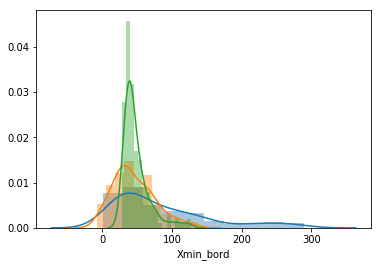

In [363]:
sns.distplot(vy.Xmin_true)
#sns.distplot(data.Xmin_true)

sns.distplot(vy.x)
sns.distplot(vy.Xmin_bord)
#sns.distplot(data.Xmin_true);

In [192]:
(bt.Xmin_true - bt.Xmin_bord).mean()

55.828213794893735

In [352]:
def search(name, step):
    arr = []
    for _ in range(100):
        arr.append(vy[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())
        vy[name] = vy[name] + step
        #test_data[name] = test_data[name] + step

    
    print('local max %.6f'  % max(arr))
    num = np.array(arr).argmax()
    vy[name] = vy[name] - step*100 + step*(num - 1)
    #test_data[name] = test_data[name] - step*100 + step*(num - 1)
    step = step / 10
    print(vy[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())
    del arr[:]
    
    for _ in range(1000):
        arr.append(vy[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())
        vy[name] = vy[name] + step
        #test_data[name] = test_data[name] + step

      
    print('local max %.6f'  % max(arr))
    
    num = np.array(arr).argmax()
    vy[name] = vy[name] - step*1000 + step*(num)
    #test_data[name] = test_data[name] - step*1000 + step*(num)
    print(vy[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())

In [358]:
search('Xmax_bord', 2)

local max 0.487116
0.4870882528899271
local max 0.487140
0.4871403866679105


In [351]:
vy[['y','Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.47442356277754966

In [239]:
data.head()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,true_square,weight,height
101,3973,62,932,93,959,98,47,959,938,837,31,27
929,35476,52,957,90,982,89,53,981,957,950,38,25
31,843,44,989,84,1014,80,47,1014,988,1000,40,25
418,16852,65,715,100,744,103,40,749,704,1015,35,29
423,17177,56,714,89,745,103,40,761,714,1023,33,31


In [225]:
bt.Xmin_bord = bt.Xmin_bord - 200

In [216]:
bt.head()

,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmin_bord,Ymin_bord,Xmax_bord,Ymax_bord,iou,bord_square,true_square
72,233,698,622,920,75.517508,776.588204,451.770785,1165.744767,0.149094,4.447622e+05,267243
419,202,986,345,1120,101.728242,894.941826,452.692985,1173.778497,0.183666,4.098040e+05,131274
114,23,359,58,390,55.963468,365.260863,74.591209,376.430791,0.221904,1.437483e+04,12845
372,218,901,853,1145,60.955989,746.514743,901.804118,1543.330078,0.225044,1.300888e+06,588645
705,119,417,339,675,53.051164,353.619523,339.262452,931.762380,0.317301,2.790615e+05,122320


In [347]:
vy['y'] = x

In [221]:
bt.iou.mean()

0.5251902127603182

In [529]:
datta[(datta.Ymax_true - datta.Ymin_true) < (datta.Xmax_true - datta.Xmin_true)].shape

(664, 23)

In [531]:
datta[(datta.Ymax_bord - datta.Ymin_bord) < (datta.Xmax_bord - datta.Xmin_bord)].shape

(706, 23)

In [530]:
datta[(datta.Xmax_true - datta.Xmin_true) < (datta.Ymax_true - datta.Ymin_true)].shape

(194, 23)

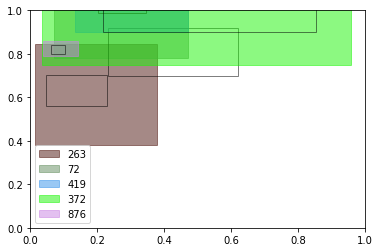

In [528]:
draw(datta[(datta.Ymax_true - datta.Ymin_true) < (datta.Xmax_true - datta.Xmin_true)].iloc[:5,:], '_bord')

In [138]:
pos_data = data[data.Xmin_true > 1]
len(pos_data.Xmin_true) - len(pos_data[pos_data.Xmin_bord > 1].Xmin_bord)

0

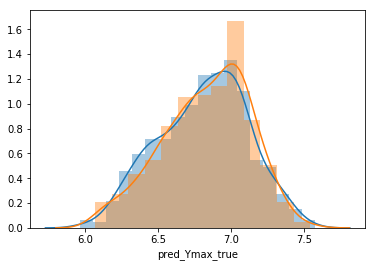

In [286]:
mean = pos_data[(np.log(pos_data.pred_Xmin_true) + 1 > pos_data.logXmin_true.mean() - 0.5 ) \
            & (np.log(pos_data.pred_Xmin_true) + 1 < pos_data.logXmin_true.mean()  + 0.5 )]

side = pos_data[(np.log(pos_data.pred_Xmin_true) + 1 < pos_data.logXmin_true.mean() - 0.7 ) \
            | (np.log(pos_data.pred_Xmin_true) + 1 > pos_data.logXmin_true.mean()  + 0.7 )]

gen = pd.concat([side, mean[:150]])

sns.distplot(np.log(pos_data.Ymax_true))
#sns.distplot(np.log(pos_data.Xmin_bord));
sns.distplot(np.log(gen.pred_Ymax_true));
#sns.distplot(np.log(pos_data['pred_Xmin_true']) + 1);


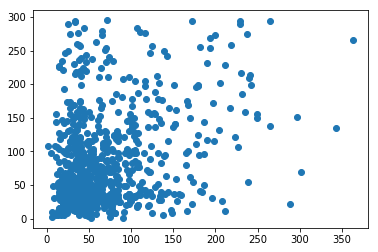

In [135]:
plt.scatter(datta.Xmin_bord, datta.Xmin_true);

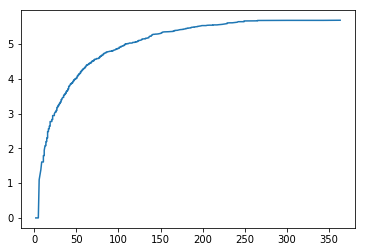

In [130]:
plt.plot(sorted(datta.Xmin_bord), sorted(np.log(datta.Xmin_true)));
#plt.plot(sorted(vy.Xmin_bord), sorted(vy.x));

In [56]:
datta['perimeter'] = datta.Xmin_bord * datta.Xmax_bord

In [137]:
quorum['perimeter'] = quorum.Xmin_bord * quorum.Xmax_bord

In [69]:
ttest_data['perimeter'] = ttest_data.Xmin_bord * ttest_data.Xmax_bord

In [351]:
datta['perimeter'] = datta['perimeter']/1000

In [356]:
ttest_data['perimeter'] = ttest_data['perimeter']/1000

In [352]:
datta['perimeter'] = datta['perimeter']**1.15

In [357]:
ttest_data['perimeter'] = ttest_data['perimeter']**1.15

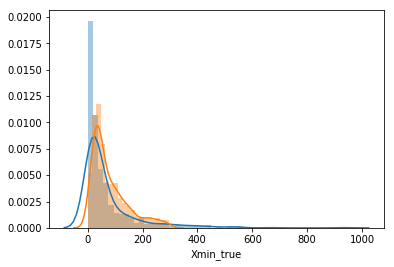

In [358]:
sns.distplot(ttest_data['perimeter'])
sns.distplot(datta.Xmin_true);

In [325]:
datta.corr().Xmin_true.perimeter

0.3631347169015916

In [218]:
datta[datta.Xmin_bord < 250].corr().Xmin_true

itemId          -0.009319
Xmin_true        1.000000
Ymin_true        0.042753
Xmax_true        0.268447
Ymax_true        0.107179
Xmax_bord        0.314661
Xmin_bord        0.327127
Ymax_bord        0.166377
Ymin_bord       -0.002226
true_square     -0.023814
weight           0.002575
height           0.097192
iou             -0.343993
Xmin_bordpred    0.327127
Ymin_bordpred   -0.002226
Xmax_bordpred    0.314661
Ymax_bordpred    0.166377
y                0.422673
bord_square      0.211571
sq               0.031278
perimeter        0.047831
Name: Xmin_true, dtype: float64

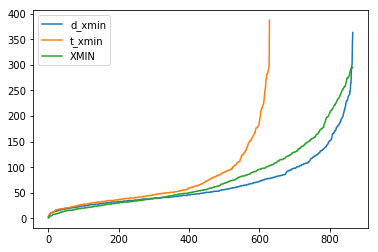

In [129]:
plt.plot(sorted(datta.Xmin_bord), label = 'd_xmin');

plt.plot(sorted(ttest_data.Xmin_bord), label = 't_xmin');
plt.plot(sorted(datta.Xmin_true), label = 'XMIN');
plt.legend()

(240, 300)

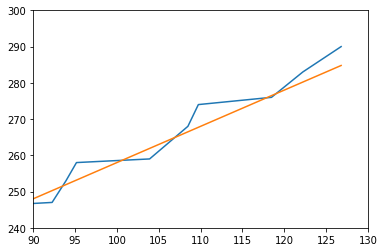

In [307]:
plt.plot(sorted(vy.Xmin_bord), sorted(vy.Xmin_true));
plt.plot(sorted(vy.Xmin_bord), sorted(vy.Xmin_bord + 158))
#plt.plot(sorted(vy.Xmin_bord), sorted((vy.Xmin_bord - 20)**1.3));
plt.xlim([90, 130])
plt.ylim([240, 300])

In [345]:
x = [(x - 20)**1.35 if x < 75 else x + 158 for x in sorted(vy.Xmin_bord)]

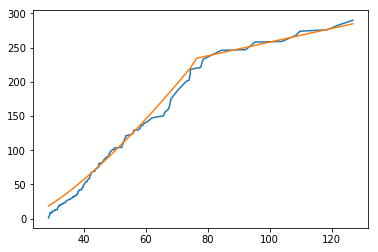

In [313]:
plt.plot(sorted(vy.Xmin_bord), sorted(vy.Xmin_true));
plt.plot(sorted(vy.Xmin_bord), x);

In [289]:
list(set(sorted((vy.Xmin_bord - 20)**1.3)).intersection(vy.Xmin_true))

[]

In [283]:
vy.Xmin_bord.min()

28.603033761422743

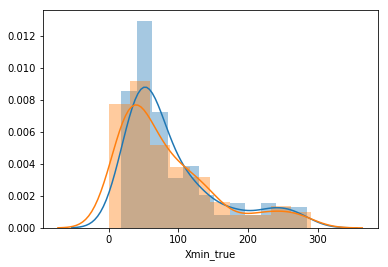

In [318]:
sns.distplot(x)
sns.distplot(vy.Xmin_true);

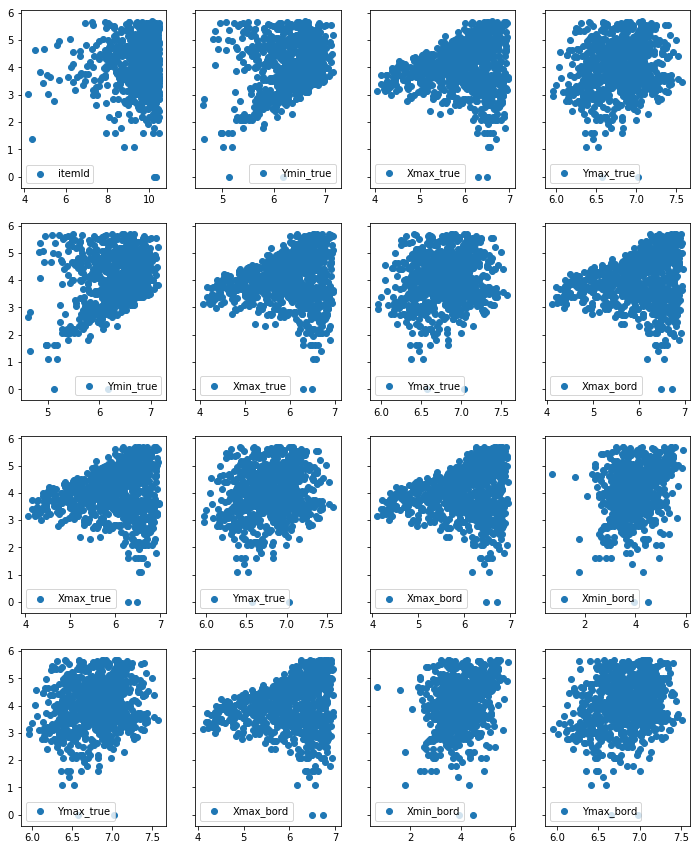

In [356]:
f, ax = plt.subplots(4, 4, sharey=True, figsize=(12,15))
col = data.drop(columns = ['Xmin_true']).columns.values
for k in range(4):
    for m in range(4):
        ax[k][m].scatter(np.log(data[col[k+m]]), np.log(data.Xmin_true), label=col[k+m]);
        ax[k][m].legend()


In [441]:
vy['rev_x'] = pd.concat([vy[vy.xxx > 0].xxx/2, (vy[vy.xxx < 0].xxx+200)*0.25])

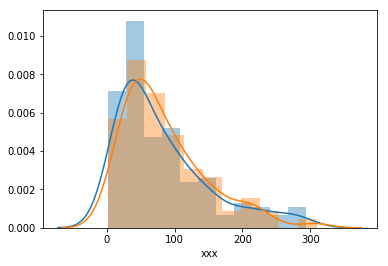

In [417]:
sns.distplot(vy.Xmin_true)
sns.distplot(vy[vy.xxx > 0].xxx/2);

In [440]:
vy.Xmin_true.mean()

82.58620689655173

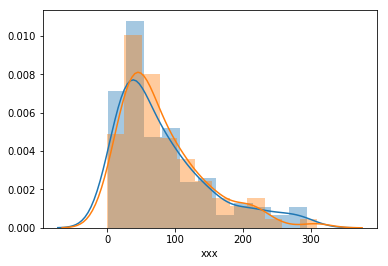

In [439]:
sns.distplot(vy.Xmin_true)
sns.distplot(pd.concat([vy[vy.xxx > 0].xxx/2, (vy[vy.xxx < 0].xxx+200)*0.25]));

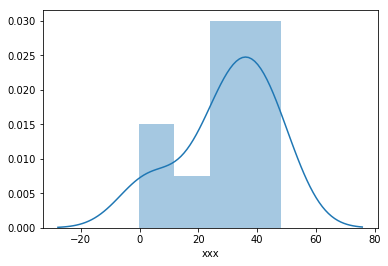

In [432]:
sns.distplot((vy[vy.xxx < 0].xxx+200)*0.25)

In [419]:
vy.Xmin_true.shape

(174,)

In [418]:
pd.concat([vy[vy.xxx > 0].xxx/2, vy[vy.xxx < 0].xxx*-1]).shape

(174,)

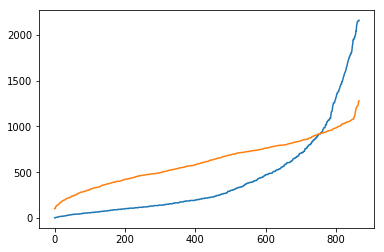

In [367]:
plt.plot(sorted(data.Xmin_true**1.35))
plt.plot(sorted(data.));

In [380]:
data.corr()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,bord_square,X_mean,Y_mean,height,weight,max_X-Y,min_X-Y,true_square
itemId,1.000000,-0.014778,-0.010904,-0.005667,-0.014642,0.000660,-0.018440,-0.014133,-0.012498,-0.014696,-0.002881,-0.014550,0.004576,-0.003555,0.014669,0.008738,-0.031849
Xmin_true,-0.014778,1.000000,0.040840,0.278088,0.109749,0.325451,0.336415,0.171027,-0.006358,0.219508,0.366876,0.094105,0.266477,0.231145,0.132749,0.077280,-0.016559
Ymin_true,-0.010904,0.040840,1.000000,-0.242092,0.707417,-0.223218,0.141091,0.688825,0.977532,-0.253151,-0.181143,0.900767,-0.261253,-0.266440,-0.892757,-0.957527,-0.221070
Xmax_true,-0.005667,0.278088,-0.242092,1.000000,0.409322,0.934253,0.280363,0.450969,-0.240470,0.861493,0.923243,0.131786,0.909622,0.876515,0.420843,0.301912,0.879602
Ymax_true,-0.014642,0.109749,0.707417,0.409322,1.000000,0.424624,0.246630,0.943362,0.711665,0.375484,0.442217,0.907462,0.388268,0.383627,-0.543070,-0.666789,0.482556
Xmax_bord,0.000660,0.325451,-0.223218,0.934253,0.424624,1.000000,0.273838,0.461916,-0.240744,0.912572,0.983239,0.137878,0.979177,0.891151,0.471135,0.300814,0.818847
Xmin_bord,-0.018440,0.336415,0.141091,0.280363,0.246630,0.273838,1.000000,0.246249,0.151219,0.043975,0.444603,0.218908,0.072889,0.141379,0.009912,0.057908,0.147588
Ymax_bord,-0.014133,0.171027,0.688825,0.450969,0.943362,0.461916,0.246249,1.000000,0.683669,0.457324,0.476876,0.925160,0.427019,0.491079,-0.564696,-0.638594,0.445394
Ymin_bord,-0.012498,-0.006358,0.977532,-0.240470,0.711665,-0.240744,0.151219,0.683669,1.000000,-0.285744,-0.195545,0.909516,-0.281564,-0.299998,-0.903937,-0.978085,-0.187350
bord_square,-0.014696,0.219508,-0.253151,0.861493,0.375484,0.912572,0.043975,0.457324,-0.285744,1.000000,0.858240,0.111857,0.937035,0.938863,0.394349,0.297845,0.837491


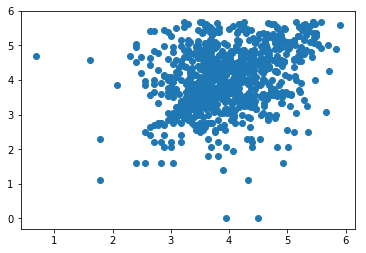

In [349]:
plt.scatter(np.log(data.Xmin_bord), np.log(data.Xmin_true));

In [45]:
(np.log(data.weight) / np.log(data.height)).min()

0.7743279387529456

In [33]:
data.columns

Index(['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true',
       'Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord', 'bord_square',
       'X_mean', 'Y_mean', 'height', 'weight', 'max_X-Y', 'min_X-Y', 'Ymax2',
       'Xmax2', 'Ymin2', 'Xmin2'],
      dtype='object')

In [287]:
gen.shape

(387, 28)

In [256]:
side = pos_data[(np.log(pos_data.pred_Xmin_true) + 1 < pos_data.logXmin_true.mean() - 0.7 ) \
            | (np.log(pos_data.pred_Xmin_true) + 1 > pos_data.logXmin_true.mean()  + 0.7 )]

In [223]:
mean = pos_data[(np.log(pos_data.pred_Xmin_true) + 1 > pos_data.logXmin_true.mean() - 0.5 ) \
            & (np.log(pos_data.pred_Xmin_true) + 1 < pos_data.logXmin_true.mean()  + 0.5 )]

In [257]:
gen = pd.concat([side, mean[:150]])

In [298]:
(gen.pred_Xmin_true - gen.Xmin_true).mean()

-59.693566123012424

In [299]:
gen.pred_Xmin_true = gen.pred_Xmin_true + 60

In [264]:
gen.shape

(387, 28)

In [300]:
gen[['pred_Xmin_true','pred_Ymin_true', 'pred_Xmax_true', 'pred_Ymax_true', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.4851744550405786

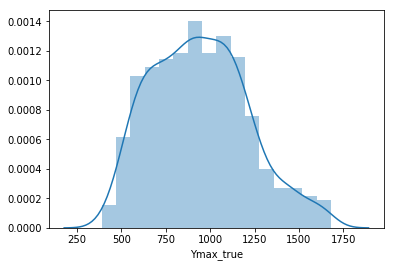

In [433]:
sns.distplot(data[data.Ymax_true < 1700].Ymax_true)

In [423]:
data.shape

(873, 9)

In [432]:
data[data.Ymax_true < 1700].shape

(865, 9)

In [546]:
data['bord_square'] = (data.Xmax_bord - data.Xmin_bord)*(data.Ymax_bord - data.Ymin_bord)

In [117]:
data['lap_square'] = (data.Xmax_lap - data.Xmin_lap)*(data.Ymax_lap - data.Ymin_lap)

In [48]:
data.head()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,bord_square,X_mean,Y_mean,height,weight,max_X-Y,min_X-Y,Ymax2,Xmax2,Ymin2,Xmin2
6,64,21,416,223,565,244,22,564,417,32634,133.0,490.5,222,147,-320,-395,319225,319225,173056,441
7,78,4,105,816,644,617,49,707,194,291384,333.0,450.5,568,513,-90,-145,414736,414736,11025,16
8,90,103,372,324,542,474,35,608,269,148821,254.5,438.5,439,339,-134,-234,293764,293764,138384,10609
9,118,46,1277,143,1408,188,47,1372,1269,14523,117.5,1320.5,141,103,-1184,-1222,1982464,1982464,1630729,2116
10,137,31,717,787,1308,781,59,1194,724,339340,420.0,959.0,722,470,-413,-665,1710864,1710864,514089,961


In [269]:
(data['true_square'] - data['lap_square']).mean()

104534.11770943797

In [226]:
(data['true_square'] - data['bord_square']).mean()

-24873.97030752916

In [277]:
lap_more = data[data['true_square'] < data['lap_square']]
true_more = data[data['true_square'] > data['lap_square']]

In [273]:
(data[data['true_square'] < data['lap_square']].lap_square - data[data['true_square'] < data['lap_square']].true_square).mean()

44283.6976744186

In [274]:
(data[data['true_square'] < data['lap_square']].lap_square - data[data['true_square'] < data['lap_square']].true_square).min()

1

In [237]:
len(data[data['true_square'] < data['bord_square']])/len(data)

0.6214209968186638

In [270]:
len(data[data['true_square'] > data['lap_square']])/len(data)

0.9066808059384942

In [50]:
small = data[data['true_square'] < data['bord_square']]

In [51]:
big = data[data['true_square'] > data['bord_square']]

In [52]:
len(small)

532

In [26]:
small[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true', \
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5413379965775377

In [27]:
big[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true', \
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.6487008345835524

In [28]:
data['bord_less_true'] = (data['true_square'] < data['bord_square']).map({True: 1, False:0})

In [355]:
(big.true_square - big.bord_square).mean()

54773.225988700564

In [365]:
for x in ['Xmin_', 'Ymin_', 'Xmax_', 'Ymax_']:
    print(x + 'mean %g' %(big[x+'true'] - big[x+'bord']).mean())

Xmin_mean -22.8192
Ymin_mean -16.7542
Xmax_mean 29.7797
Ymax_mean 35.2458


In [393]:
small.columns

Index(['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true',
       'Xmax_lap', 'Xmin_lap', 'Ymax_lap', 'Ymin_lap', 'Xmax_bord',
       'Xmin_bord', 'Ymax_bord', 'Ymin_bord', 'true_square', 'bord_square'],
      dtype='object')

In [395]:
for x in ['Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true']:
    print(x + ' mean %g' %(small[x].mean() - big[x].mean()))

Xmin_true mean 48.2821
Ymin_true mean 6.12457
Xmax_true mean -76.0603
Ymax_true mean -101.152


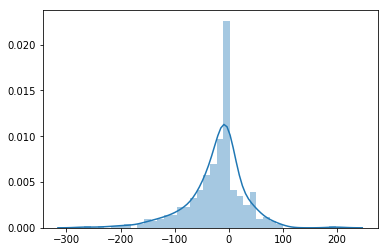

In [360]:
sns.distplot(big.Xmin_true - big.Xmin_bord)

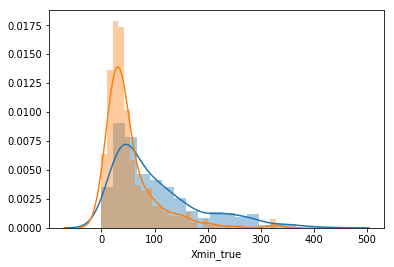

In [242]:
sns.distplot(small.Xmin_true)
sns.distplot(big.Xmin_true);

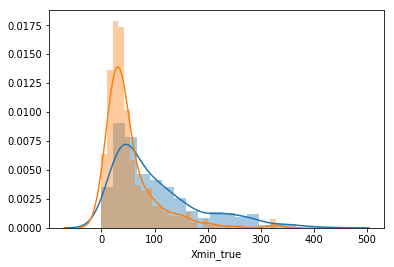

In [309]:
sns.distplot(small.Xmin_true)
sns.distplot(big.Xmin_true)

In [263]:
small.corr()['Xmin_bord']['Xmin_true']

0.4317935143105936

In [264]:
big.corr()['Xmin_bord']['Xmin_true']

0.5657001217872568

In [265]:
big.corr()['Ymax_bord']['Ymax_true']

0.9634950992707705

In [266]:
small.corr()['Ymax_bord']['Ymax_true']

0.951285198234739

In [289]:
data[['pred_Xmin_bord', 'pred_Ymin_bord', 'pred_Xmax_bord', 'pred_Ymax_bord', 'Xmin_true', \
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5151476083283604

In [ ]:
# самое большое значение - ymax, xmin, xmax, ymin -57

In [333]:
data[['lgb_Xmin_true', 'lgb_Ymin_true', 'lgb_Xmax_true','lgb_Ymax_true', \
      'Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5139580708654052

In [297]:
data[['pred_Xmin_bord', 'Ymin_true', 'pred_Xmax_bord', 'pred_Ymax_bord', 'Xmin_true', \
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()
lgb_

0.5750740010950101

In [135]:
data["iou"] = data[['pred_Xmin','pred_Ymin', 'pred_Xmax', 'pred_Ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [ ]:
data["iou"].mean()

In [150]:
quorum.head()

,Xmax,Xmin,Ymax,Ymin
itemId,,,,
18,764,126,1132,634
19,119,27,729,559
33,414,21,652,380
62,639,35,1262,824
114,216,41,780,570


In [154]:
quorum.to_csv('submission2.csv', header = False)

In [408]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(data['Xmin_true'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.11515302]
 [-1.10188493]
 [-1.10188493]
 [-1.10188493]
 [-1.10188493]
 [-1.10188493]
 [-1.10188493]
 [-1.10188493]
 [-1.08861683]
 [-1.08861683]]

outer range (high) of the distribution:
[[3.4358031 ]
 [3.47560738]
 [3.47560738]
 [3.51541166]
 [3.62155641]
 [3.71443306]
 [3.97979494]
 [4.0594035 ]
 [4.08593969]
 [4.65646771]]


/home/rebinew/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rebinew/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [145]:
df_submission_extended = pd.DataFrame(
    {'iou': data['iou']}, 
    index=quorum.index)
df_submission_extended.to_csv('submission1.csv')

In [100]:
from sklearn.linear_model import LinearRegression

In [533]:
lin = LinearRegression(n_jobs = -1)

In [417]:
data['Xmin_true'].idxmin()

142

In [418]:
data['Xmin_true'].iloc[142]

-1

In [63]:
np.log(data['Xmin_true']+min(data['Xmin_true']+1)).isna().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


6

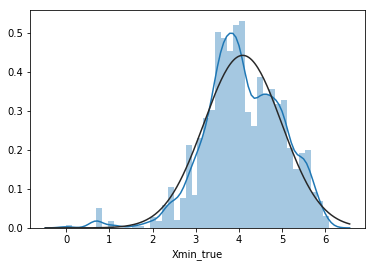

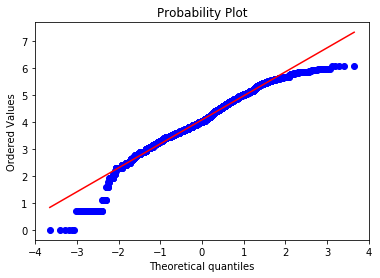

In [64]:
sns.distplot(np.log(data['Xmin_true']+2), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(data['Xmin_true']+2), plot=plt)

In [129]:
data['Xmean'] = (data.Xmax_bord + data.Xmin_bord)/2
data['Ymean'] = ((data.Ymax_bord + data.Ymin_bord)/2)
    

In [379]:
data.corr()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,bord_square,X_mean,Y_mean,height,weight,max_X-Y,min_X-Y,true_square
itemId,1.000000,-0.014778,-0.010904,-0.005667,-0.014642,0.000660,-0.018440,-0.014133,-0.012498,-0.014696,-0.002881,-0.014550,0.004576,-0.003555,0.014669,0.008738,-0.031849
Xmin_true,-0.014778,1.000000,0.040840,0.278088,0.109749,0.325451,0.336415,0.171027,-0.006358,0.219508,0.366876,0.094105,0.266477,0.231145,0.132749,0.077280,-0.016559
Ymin_true,-0.010904,0.040840,1.000000,-0.242092,0.707417,-0.223218,0.141091,0.688825,0.977532,-0.253151,-0.181143,0.900767,-0.261253,-0.266440,-0.892757,-0.957527,-0.221070
Xmax_true,-0.005667,0.278088,-0.242092,1.000000,0.409322,0.934253,0.280363,0.450969,-0.240470,0.861493,0.923243,0.131786,0.909622,0.876515,0.420843,0.301912,0.879602
Ymax_true,-0.014642,0.109749,0.707417,0.409322,1.000000,0.424624,0.246630,0.943362,0.711665,0.375484,0.442217,0.907462,0.388268,0.383627,-0.543070,-0.666789,0.482556
Xmax_bord,0.000660,0.325451,-0.223218,0.934253,0.424624,1.000000,0.273838,0.461916,-0.240744,0.912572,0.983239,0.137878,0.979177,0.891151,0.471135,0.300814,0.818847
Xmin_bord,-0.018440,0.336415,0.141091,0.280363,0.246630,0.273838,1.000000,0.246249,0.151219,0.043975,0.444603,0.218908,0.072889,0.141379,0.009912,0.057908,0.147588
Ymax_bord,-0.014133,0.171027,0.688825,0.450969,0.943362,0.461916,0.246249,1.000000,0.683669,0.457324,0.476876,0.925160,0.427019,0.491079,-0.564696,-0.638594,0.445394
Ymin_bord,-0.012498,-0.006358,0.977532,-0.240470,0.711665,-0.240744,0.151219,0.683669,1.000000,-0.285744,-0.195545,0.909516,-0.281564,-0.299998,-0.903937,-0.978085,-0.187350
bord_square,-0.014696,0.219508,-0.253151,0.861493,0.375484,0.912572,0.043975,0.457324,-0.285744,1.000000,0.858240,0.111857,0.937035,0.938863,0.394349,0.297845,0.837491


In [444]:
tx, vx, ty, vy = train_test_split(data[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord']],\
                 data[['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']], test_size=0.3)


for X, y in zip(['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord'], \
                ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']):
    #data['pred_%s' %y] = 
    vy[X] = lin.fit(tx[X].values.reshape(-1, 1), ty[y]).predict(vx[X].values.reshape(-1, 1))
    #.predict(data[X].values.reshape(-1, 1))
    #print(“Hello %s” % name)

In [569]:
tx, vx, ty, vy = train_test_split(data[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord']],\
                 data[['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'true_square']], test_size=0.3)



vy['pred'] = lin.fit(tx, ty.true_square).\
predict(vx)

In [572]:
lin.coef_

array([-145.6165211 , -219.48634756,  374.26489888,  260.54658948])

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [802]:
test.head()

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,1581,34804,86,640,242,743,43,678,288,777
1,1351,34804,85,655,273,766,32,597,197,784
2,161,34804,85,648,268,748,32,570,197,767
3,313,5704,32,618,647,1268,160,721,891,1183
4,1097,5704,25,620,602,1242,160,721,891,1183


In [259]:
data = data.drop(columns = ['Ymax2','Xmax2', 'Ymin2', 'Xmin2'], inplace = True)

In [38]:
#dd = votes.merge(answers, on=["itemId"])
tx, vx, ty, vy = train_test_split(data[data.iou > 0.35],\
                 data[data.iou > 0.35][['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']], test_size=0.2, shuffle = True)


for X, y in zip(['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord'], \
                ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']):
    vy[X] = knn.fit(tx[X].values.reshape(-1,1), ty[y]).predict(vx[X].values.reshape(-1,1))
    #.predict(data[X].values.reshape(-1, 1))
    #print(“Hello %s” % name)

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression  

In [174]:
datta.columns

Index(['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true',
       'Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord', 'true_square',
       'weight', 'height', 'iou', 'Xmin_bordpred', 'Ymin_bordpred',
       'Xmax_bordpred', 'Ymax_bordpred', 'y'],
      dtype='object')

In [177]:
#dd = votes.merge(answers, on=["itemId"])
tx, vx, ty, vy = train_test_split(datta[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord']],\
                 datta[['Xmin_bordpred', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord','Xmin_true',
                                        'Ymin_true', 'Xmax_true','Ymax_true']], test_size=0.2, shuffle = True)

regr = RandomForestRegressor(max_depth=2, random_state=0,
                           n_estimators=100)
vy['x'] = regr.fit(tx, ty.Xmin_true).predict(vx)

In [178]:
vy[['x', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5616999419049967

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [56]:
kf = KFold(n_splits=10, shuffle = True)

In [40]:
X = dd[['Xmin', 'Ymin', 'Xmax', 'Ymax', 'itemId']].values
y = dd[['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'itemId']].values
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    df = pd.DataFrame(X_test[:, -1], columns = ['itemId'])
    for f, s in zip(['Xmin', 'Ymin', 'Xmax', 'Ymax'], \
                range(5)):
        
        df[f] = knn.fit(X_train[:, :4], y_train[:, s]).predict(X_test[:, :4])
        df['col' + str(s)] = y_test[:, s]
        
    qu = df.groupby("itemId")[['Xmin','Ymin', 'Xmax', 'Ymax', \
                      'col0','col1', 'col2', 'col3']].mean().reset_index()
    
    print(qu[['Xmin','Ymin', 'Xmax', 'Ymax', 'col0','col1', 'col2', 'col3']].apply(intersection_over_union, axis=1).mean())
    
    #[['Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()
    

NameError: name 'dd' is not defined

In [77]:
data[['Xmin_bord', 'Xmax_bord']].std()

Xmin_bord     51.541636
Xmax_bord    252.954886
dtype: float64

In [269]:
data['X_mean'] = data[['Xmin_bord', 'Xmax_bord']].apply(np.mean, axis=1)
data['Y_mean'] = data[['Ymin_bord', 'Ymax_bord']].apply(np.mean, axis=1)

In [92]:
data['rank'] = data.iou.rank(ascending=False,method='first')

In [37]:
lin = LinearRegression(normalize = True)

In [59]:
small.shape

(532, 21)

In [58]:
data.columns

Index(['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true',
       'Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord', 'bord_square',
       'X_mean', 'Y_mean', 'height', 'weight', 'max_X-Y', 'min_X-Y', 'Ymax2',
       'Xmax2', 'Ymin2', 'Xmin2', 'true_square'],
      dtype='object')

In [72]:
X = small.drop(columns = ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'true_square']).values
y = small[['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'itemId']].values
X_t = big.drop(columns = ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'true_square']).values
y_t = [['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'itemId']].values
ans = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    df = pd.DataFrame(X_test[:, -1], columns = ['itemId'])
    for f, s in zip(['Xmin', 'Ymin', 'Xmax', 'Ymax'], \
                range(5)):
        
        df[f] = lin.fit(X_train[:, :-1], y_train[:, s]).predict(X_test[:, :-1])
        df['col' + str(s)] = y_test[:, s]
        
    qu = df.groupby("itemId")[['Xmin','Ymin', 'Xmax', 'Ymax', \
                      'col0','col1', 'col2', 'col3']].mean().reset_index()
    
    print(qu[['Xmin','Ymin', 'Xmax', 'Ymax', 'col0','col1', 'col2', 'col3']].apply(intersection_over_union, axis=1).mean())
    ans.append(qu[['Xmin','Ymin', 'Xmax', 'Ymax', 'col0','col1', 'col2', 'col3']].apply(intersection_over_union, axis=1).mean())
    
    #[['Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()


ValueError: not enough values to unpack (expected 4, got 2)

In [68]:
# train big predict small
sum(ans)/len(ans)

0.5160021851612917

In [98]:
rid = Ridge()

In [109]:
rid.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
rid.coef_.shape

(5, 16)

In [108]:
X.head()

,itemId,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,bord_square,X_mean,Y_mean,height,weight,max_X-Y,min_X-Y,Ymax2,Xmax2,Ymin2,Xmin2
6,64,244,22,564,417,32634,133.0,490.5,222,147,-320,-395,319225,319225,173056,441
8,90,474,35,608,269,148821,254.5,438.5,439,339,-134,-234,293764,293764,138384,10609
9,118,188,47,1372,1269,14523,117.5,1320.5,141,103,-1184,-1222,1982464,1982464,1630729,2116
15,229,596,40,893,363,294680,318.0,628.0,556,530,-297,-323,619369,619369,165649,256
16,260,494,83,1006,740,109326,288.5,873.0,411,266,-512,-657,861184,861184,576081,15376


In [105]:
X = small.drop(columns = ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'true_square'])
y = small[['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'itemId']]
X_t = big.drop(columns = ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'true_square'])
y_t = big[['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'itemId']]

In [107]:
rid.fit(X,y)
rid.fit(X_t, y_t)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [102]:

df = pd.DataFrame(X_t.iloc[:, 0], columns = ['itemId'])
for f, s in zip(['Xmin', 'Ymin', 'Xmax', 'Ymax'], \
            range(5)):
    
    df[f] = lin.fit(X.iloc[:, 1:], y.iloc[:, s]).predict(X_t.iloc[:, 1:])
    df['col' + str(s)] = y_t.iloc[:, s]
        
qu = df.groupby("itemId")[['Xmin','Ymin', 'Xmax', 'Ymax', \
                      'col0','col1', 'col2', 'col3']].mean().reset_index()
    
print(qu[['Xmin','Ymin', 'Xmax', 'Ymax', 'col0','col1', 'col2', 'col3']].apply(intersection_over_union, axis=1).mean())

0.5867556038210786


In [90]:
X_t.head()

,itemId,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,bord_square,X_mean,Y_mean,height,weight,max_X-Y,min_X-Y,Ymax2,Xmax2,Ymin2,Xmin2
7,78,617,49,707,194,291384,333.0,450.5,568,513,-90,-145,414736,414736,11025,16
10,137,781,59,1194,724,339340,420.0,959.0,722,470,-413,-665,1710864,1710864,514089,961
11,142,669,227,711,295,183872,448.0,503.0,442,416,-42,-68,611524,611524,38809,11449
12,161,292,48,992,804,45872,170.0,898.0,244,188,-700,-756,990025,990025,643204,1764
13,168,446,98,1216,472,258912,272.0,844.0,348,744,-770,-374,1002001,1002001,189225,441


In [801]:
test.shape

(3615, 10)

In [805]:
qu.shape

(630, 5)

In [682]:
test_data.shape

(630, 0)

In [639]:
vy[vy.itemId == 17208]

,Xmin_true,Ymin_true,Xmax_true,Ymax_true,itemId,pred_Xmin_true,pred_Ymin_true,pred_Xmax_true,pred_Ymax_true
3772,159,876,439,1132,17208,176,1084,263,1199
3769,159,876,439,1132,17208,118,942,277,1063
3771,159,876,439,1132,17208,118,942,277,1063


In [742]:
qu = vy.groupby("itemId").apply(maxarea).merge(vy.groupby("itemId")['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true'].mean(), on = 'itemId')

In [717]:
vy.shape

(1602, 9)

In [720]:
vy.columns

Index(['Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true', 'itemId', 'Xmin',
       'Ymin', 'Xmax', 'Ymax'],
      dtype='object')

In [716]:
qu.shape

(752, 4)

In [722]:
qu.columns

Index(['Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord'], dtype='object')

In [737]:
def maxarea(df):
    d = {}
    d['Xmax_bord'] = max(df.Xmax)
    #print(maxX)
    d['Xmin_bord'] = min(df.Xmin)
    #print(minX)
    d['Ymax_bord'] = max(df.Ymax) 
    d['Ymin_bord'] = min(df.Ymin)
    #if (maxX - minX > 0) & (maxY - minY > 0):
    return pd.Series(d, index=['Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord'])

In [ ]:
qu = vy.groupby("itemId")[['Xmin_true','Ymin_true', 'Xmax_true', 'Ymax_true', \
                      'pred_Xmin_true','pred_Ymin_true', 'pred_Xmax_true', 'pred_Ymax_true']].mean().reset_index()

In [803]:
qu = test.groupby("itemId")[['Xmin_true','Ymin_true', 'Xmax_true', 'Ymax_true']].mean().reset_index()

In [804]:
qu = qu.sort_values(by=['itemId'])

In [605]:
fin = qu.merge(vy)

(3615, 6)

In [580]:
lin.score(vx, vy.true_square)

0.6767446525100895

In [570]:
(vy.pred - vy.true_square).mean()

-20931.883469234705

(0, 500000)

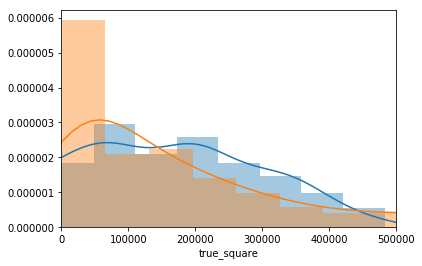

In [571]:
sns.distplot(vy.pred)
sns.distplot(vy.true_square)
plt.xlim([0, 500000])

In [746]:
qu[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.7304997232645876

In [548]:
data.columns

Index(['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true',
       'Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord', 'pred_Xmin_true',
       'pred_Ymin_true', 'pred_Xmax_true', 'pred_Ymax_true', 'true_square',
       'bord_square'],
      dtype='object')

In [307]:
test_data.head()

,pred_Xmin_lap,pred_Ymin_bord,pred_Xmax_bord,pred_Ymax_bord
itemId,,,,
18,77.732082,643.482742,729.108808,1112.907586
19,58.607804,570.177553,126.413291,717.387702
33,65.735944,395.222502,402.064729,641.816905
62,74.428797,829.189221,612.307351,1240.494645
114,66.605229,580.928981,217.051221,767.441087


In [302]:
for X, y in zip(['Xmin_', 'Ymin_', 'Xmax_', 'Ymax_'], \
                ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']):
    datadata[[X+'bord', X+'lap']]

Index(['Xmin_bord', 'Xmin_lap'], dtype='object')
Index(['Ymin_bord', 'Ymin_lap'], dtype='object')
Index(['Xmax_bord', 'Xmax_lap'], dtype='object')
Index(['Ymax_bord', 'Ymax_lap'], dtype='object')


In [112]:
lin.fit(data.Ymin.values.reshape(-1,1), data.Ymin_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [113]:
lin.score(data.Ymin.values.reshape(-1,1), data.Ymin_true)

0.8913935857864995

In [109]:
lin.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)>

In [131]:
data.head()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmax,Xmin,Ymax,Ymin,iou,pred Xmin,pred Ymin,pred Xmax,pred Ymax,pred_Xmin,pred_Ymin,pred_Xmax,pred_Ymax
0,5,198,827,649,1340,483,210,1160,925,0.526254,89.206648,854.993349,580.398659,1229.458270,89.206648,854.993349,580.398659,1229.458270
1,10,26,605,433,847,402,96,852,570,0.460606,69.386942,520.248261,500.948373,938.591455,69.386942,520.248261,500.948373,938.591455
2,13,233,698,622,920,561,94,950,606,0.308003,69.039228,554.194241,656.906341,1031.139987,69.039228,554.194241,656.906341,1031.139987
3,30,61,368,329,530,97,124,369,375,0.307631,74.254940,336.374198,201.783718,482.459406,74.254940,336.374198,201.783718,482.459406
4,32,30,536,328,813,126,42,624,809,0.000000,59.998660,745.611856,230.228882,723.274463,59.998660,745.611856,230.228882,723.274463


In [132]:
data['Xmin_mean'] = group.Xmin.mean()

In [305]:
def lgb_square():
    params = {
    "objective" : "regression",
    "metric" : "l1", 
    "num_threads" : 20,
    'nthread': 4,
    "verbosity" : 2
    }
    t_x,v_x,t_y,v_y = train_test_split(X_train, y_train,test_size=0.2)
    lgtrain = lgb.Dataset(t_x, t_y)
    lgvalid = lgb.Dataset(v_x, v_y)
    
    #lgtrain = lgb.Dataset(X_train, y_train,categorical_feature=categorical_features)
    #model = lgb.train(params, lgtrain, 4000, verbose_eval=200)


    model = lgb.train(params, lgtrain, 2000, valid_sets=[lgvalid], early_stopping_rounds=200, verbose_eval=200)
    pred = model.predict(vx, num_iteration=model.best_iteration)
    vy['true_square'] = pred
    #print((pred - v_y).mean())
    return model

In [47]:
from sklearn.metrics import accuracy_score

In [312]:
params = {'lambda_l1': 3.3483782188386053,
 'lambda_l2': 0.4710921246688088,
 'max_depth': 61.1702877191018,
 'min_child_samples': 85.41278882818256,
 'min_data_in_leaf': 297.8755555483252,
 'num_leaves': 25.672866108605408}

In [45]:
t_x,v_x,t_y,v_y = train_test_split(X_train, y_train,test_size=0.2)
t = pd.concat([v_x, v_y], axis = 1)

In [270]:
test_data['X_mean'] = test_data[['Xmin_bord', 'Xmax_bord']].apply(np.mean, axis=1)
test_data['Y_mean'] = test_data[['Ymin_bord', 'Ymax_bord']].apply(np.mean, axis=1)
test_data['height'] = test_data.Xmax_bord - test_data.Xmin_bord
test_data['weight'] = test_data.Ymax_bord - test_data.Ymin_bord
test_data['max_X-Y'] = test_data.Xmax_bord - test_data.Ymax_bord
test_data['min_X-Y'] = test_data.Xmin_bord - test_data.Ymin_bord

In [271]:
data['height'] = data.Xmax_bord - data.Xmin_bord
data['weight'] = data.Ymax_bord - data.Ymin_bord

In [272]:
data['max_X-Y'] = data.Xmax_bord - data.Ymax_bord
data['min_X-Y'] = data.Xmin_bord - data.Ymin_bord

In [27]:
data.head()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,bord_square,X_mean,Y_mean,height,weight,max_X-Y,min_X-Y
6,64,21,416,223,565,244,22,564,417,32634,133.0,490.5,222,147,-320,-395
7,78,4,105,816,644,617,49,707,194,291384,333.0,450.5,568,513,-90,-145
8,90,103,372,324,542,474,35,608,269,148821,254.5,438.5,439,339,-134,-234
9,118,46,1277,143,1408,188,47,1372,1269,14523,117.5,1320.5,141,103,-1184,-1222
10,137,31,717,787,1308,781,59,1194,724,339340,420.0,959.0,722,470,-413,-665


In [291]:
data['true_square'] = (data.Xmax_true - data.Xmin_true)*(data.Ymax_true - data.Ymin_true)

In [293]:
data.columns

Index(['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true',
       'Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord', 'bord_square',
       'X_mean', 'Y_mean', 'height', 'weight', 'max_X-Y', 'min_X-Y',
       'true_square'],
      dtype='object')

In [314]:
X_train = data.drop(columns = ['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true', 'true_square'])

#X_test = test_quorum
y_train = data['true_square']
model= lgb_square()

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's l1: 52334.3
Early stopping, best iteration is:
[49]	valid_0's l1: 51351.3


In [308]:
X_train.columns

Index(['Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord', 'bord_square',
       'X_mean', 'Y_mean', 'height', 'weight', 'max_X-Y', 'min_X-Y'],
      dtype='object')

In [311]:
vx.columns

Index(['itemId', 'Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord',
       'bord_square', 'X_mean', 'Y_mean', 'height', 'weight', 'max_X-Y',
       'min_X-Y', 'true_square'],
      dtype='object')

In [454]:
test_data.head()

,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,,,,,,,,
18,764,126,1132,634,107.860840,643.345074,725.326760,1115.746266
19,119,27,729,559,63.008330,570.600289,127.829347,717.092374
33,414,21,652,380,60.289996,396.982734,401.103357,640.922772
62,639,35,1262,824,66.632775,827.631864,609.532687,1244.344295
114,216,41,780,570,69.351109,581.269524,217.685547,767.542370


In [25]:
lin = LinearRegression(normalize = True)

In [453]:
tx, vx, ty, vy = train_test_split(data.drop(columns = ['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']),\
                 data[['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']], test_size=0.2, shuffle = True)



for X, y in zip(['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord'], \
                ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']):
    #data['pred_%s' %y] = 
    test_data[y] = lin.fit(tx[X].values.reshape(-1, 1), ty[y]).predict(test_data[X].values.reshape(-1, 1))
    #.predict(data[X].values.reshape(-1, 1))
    #print(“Hello %s” % name)

In [250]:
data.true_square.max() / 4

244282.5

In [18]:
test_data['true_square'] = (test_data.Xmax_true - test_data.Xmin_true)*(test_data.Ymax_true - test_data.Ymin_true)

In [ ]:
test_data = test_data.sort_values(by=['true_square'])

In [165]:
vy['iou'] = vy[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [166]:
vy = vy.sort_values(by=['iou'])

In [82]:
dt_sq1 = data[data['weight'] < (data['weight'].max() / 8)]

In [465]:
tx, vx, ty, vy = train_test_split(data[data.iou > 0.35].drop(columns = [ 'Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']),\
                 data[data.iou > 0.35][['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']], test_size=0.2, shuffle = True)



for X, y in zip(['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord'], \
                ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']):
    #data['pred_%s' %y] =
    lin.fit(tx[X].values.reshape(-1, 1), ty[y])
    data[X+'pred'] = lin.predict(data[X].values.reshape(-1, 1))
    test_data[X+'pred'] = lin.predict(test_data[X].values.reshape(-1, 1))

    #.predict(data[X].values.reshape(-1, 1))
    #print(“Hello %s” % name)

In [201]:
datta['sq'] = 0

In [210]:
datta.sq.value_counts()

0    737
1    130
Name: sq, dtype: int64

In [389]:
datta = datta.sort_values(by=['bord_square'])

In [212]:
int(len(datta) / 4)

216

In [209]:
datta.loc[0: int(len(datta) / 4), 'sq'] = 1

In [202]:
(datta['bord_square'] < (datta['bord_square'].max() / 4)) = 1

SyntaxError: can't assign to comparison (<ipython-input-202-8f81c6a091fd>, line 1)

In [ ]:
#train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2}})
#df['B'].mask(df['B'] > 15, 0)
datta = datta.replace(datta['bord_square'] < (datta['bord_square'].max() / 4), 1)
#datta.loc[(datta['bord_square'] < (datta['bord_square'].max() / 4)).index,'sq'] = 1

In [465]:
tx, vx, ty, vy = train_test_split(datta.drop(columns = ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']),\
                 datta[['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']], test_size=0.2, shuffle = True)



for X, y in zip(['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord'], \
                ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']):
    #data['pred_%s' %y] =
    lin.fit(tx[X].values.reshape(-1, 1), ty[y])
    data[X+'pred'] = lin.predict(data[X].values.reshape(-1, 1))
    test_data[X+'pred'] = lin.predict(test_data[X].values.reshape(-1, 1))

    #.predict(data[X].values.reshape(-1, 1))
    #print(“Hello %s” % name)

In [125]:
quorum.head()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord
0,5,198,827,649,1340,511,151,1331,914
1,10,26,605,433,847,427,72,858,559
2,13,233,698,622,920,621,46,981,600
3,30,61,368,329,530,324,65,491,353
4,48,85,1031,164,1113,163,50,1103,1029


In [134]:
tx, vx, ty, vy = train_test_split(quorum.drop(columns = ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']),\
                 quorum[['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']], test_size=0.2, shuffle = True)


lin.fit(tx['Xmin_bord'].values.reshape(-1, 1), ty['Xmin_true'])
datta['y'] = lin.predict(datta['Xmin_bord'].values.reshape(-1,1))
#test_data[X+'pred'] = lin.predict(test_data[X].values.reshape(-1, 1))

    #.predict(data[X].values.reshape(-1, 1))
    #print(“Hello %s” % name)

In [136]:
datta[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5853281758791254

In [182]:
datta.columns

Index(['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true',
       'Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord', 'true_square',
       'weight', 'height', 'iou', 'Xmin_bordpred', 'Ymin_bordpred',
       'Xmax_bordpred', 'Ymax_bordpred', 'y'],
      dtype='object')

In [477]:
data[['Xmin_bordpred', 'Ymin_bordpred', 'Xmax_bordpred', 'Ymax_bordpred', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5733339072967006

In [ ]:
vy[['Xmin_bordpred', 'Ymin_bordpred', 'Xmax_bordpred', 'Ymax_bordpred', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

In [388]:
data['iou'] = data[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [389]:
data = data.sort_values(by=['iou'])

In [393]:
data[data.iou > 0.3].shape

(843, 13)

In [645]:
test_data['Xmin_true'] = test_data['Xmin_true'] - 24

In [ ]:
data.Xmin_bordpred

In [139]:
test_data['Xmin_bord'] = sub27.Xmin_true

In [515]:
test_data['Ymin_true'] = test_data['Ymin_true'] + 0.25
test_data['Ymax_true'] = test_data['Ymax_true'] + 0.45

In [146]:
vy['Xmin_bord'] = vy['Xmin_bord'] - 25

In [644]:
np.mean(vy.Xmin_bord.values - xm)

25.056315450614974

In [58]:
xm = vy['Xmin_bord']

In [537]:
vy['Ymin_bord'] = vy['Ymin_bord'] + 0.25

In [513]:
vy['Ymax_bord'] = vy['Ymax_bord'] + 14

In [345]:
vy['xxx'] = vy.Xmax_true - (vy.Ymax_true - vy.Ymin_true)

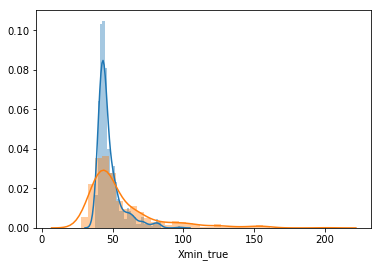

In [149]:
sns.distplot(test_data.Xmin_bord)
sns.distplot(sub27.Xmin_true)

In [131]:
test_data.Xmin_true.mean() - sub27.Xmin_true.mean()

23.38787800508583

In [132]:
test_data.head()

,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,,,,,,,,
18,764.8,98.1,1143.0,622.4,104.849657,643.893877,728.861469,1114.437075
19,119.8,-0.9,740.0,547.4,62.318989,571.239603,128.992591,717.736654
33,414.8,-6.9,663.0,368.4,59.741372,397.838069,403.351225,641.940295
62,639.8,7.1,1273.0,812.4,65.755810,827.951371,612.607811,1242.404953
114,216.8,13.1,791.0,558.4,68.333427,581.895563,219.205430,767.939436


In [130]:
sub27.Xmin_true.mean()

55.834272391193444

In [226]:
vy[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5841982355824038

In [422]:
datta[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.607262349714306

In [416]:
datta['cy'] = datta.y**1.045

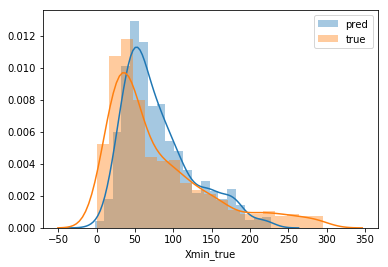

In [440]:
sns.distplot(datta.y, label = 'pred')
sns.distplot(datta.Xmin_true, label = 'true')
plt.legend()

In [441]:
search('y', -1)

local max 0.613810
0.6135877753192648
local max 0.613830
0.6138302611448782


0.6138302611448782

In [323]:
data['perimeter'] = datta['perimeter']*2

In [538]:
datta[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5572065250817689

In [15]:
datta = pd.read_csv('submission38data.csv', names = data.columns.values)
ttest_data = pd.read_csv('submission38testdata.csv', names = test_data.columns.values)

NameError: name 'data' is not defined

In [549]:
last_res = datta[['Xmin_bordpred', 'Ymin_bordpred', 'Xmax_bordpred', 'Ymax_bordpred', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()
while (True):
    res = search('Ymin_bordpred', -0.15)
    if last_res > (res-0.000199):
        break

local max 0.582499
0.5825276989227921
local max 0.582528
0.5825276989227907


In [586]:
last_res = datta[['Xmin_bordpred', 'Ymin_bordpred', 'Xmax_bordpred', 'Ymax_bordpred', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()
for _ in range(3):
    res = search('Ymin_bordpred', -0.05)

local max 0.582630
0.5826296383819042
local max 0.582630
0.5826297935394745
local max 0.582630
0.5826281722841717
local max 0.582630
0.5826297935394706
local max 0.582630
0.5826281722841679
local max 0.582630
0.5826297935394669


In [584]:
for _ in range(3):
    print('aaaa')

aaaa
aaaa
aaaa


In [27]:
ar = []
for _ in range(10000):
    vy['Xmin_bord'] = vy['Xmin_bord'] + 0.01
    ar.append(vy[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())

In [367]:
def search(name, step):
    arr = []
    for _ in range(100):
        arr.append(datta[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())
        datta[name] = datta[name] + step
        ttest_data[name] = ttest_data[name] + step

    
    print('local max %.6f'  % max(arr))
    num = np.array(arr).argmax()
    datta[name] = datta[name] - step*100 + step*(num - 1)
    ttest_data[name] = ttest_data[name] - step*100 + step*(num - 1)
    step = step / 10
    print(datta[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())
    del arr[:]
    
    for _ in range(1000):
        arr.append(datta[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())
        datta[name] = datta[name] + step
        ttest_data[name] = ttest_data[name] + step

      
    print('local max %.6f'  % max(arr))
    
    num = np.array(arr).argmax()
    datta[name] = datta[name] - step*1000 + step*(num)
    ttest_data[name] = ttest_data[name] - step*1000 + step*(num)
    print(datta[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())
    return datta[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

In [152]:
def search(name, step):
    arr = []
    for _ in range(100):
        arr.append(vy[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())
        vy[name] = vy[name] + step
        test_data[name] = test_data[name] + step

    
    print('local max %.6f'  % max(arr))
    num = np.array(arr).argmax()
    vy[name] = vy[name] - step*100 + step*(num - 1)
    test_data[name] = test_data[name] - step*100 + step*(num - 1)
    step = step / 10
    print(vy[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())
    del arr[:]
    
    for _ in range(1000):
        arr.append(vy[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())
        vy[name] = vy[name] + step
        test_data[name] = test_data[name] + step

      
    print('local max %.6f'  % max(arr))
    
    num = np.array(arr).argmax()
    vy[name] = vy[name] - step*1000 + step*(num)
    test_data[name] = test_data[name] - step*1000 + step*(num)
    print(vy[['Xmin_bord', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean())

In [346]:
vy.corr()

,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmin_bord,Ymin_bord,Xmax_bord,Ymax_bord,xxx
Xmin_true,1.000000,0.011715,0.266363,0.079656,0.362478,-0.051378,0.307169,0.152859,0.368904
Ymin_true,0.011715,1.000000,-0.287934,0.678169,0.105655,0.974450,-0.251489,0.687009,-0.131766
Xmax_true,0.266363,-0.287934,1.000000,0.397525,0.252712,-0.289225,0.938878,0.420981,0.581456
Ymax_true,0.079656,0.678169,0.397525,1.000000,0.190301,0.675592,0.416814,0.941574,-0.059983
Xmin_bord,0.362478,0.105655,0.252712,0.190301,1.000000,0.096730,0.249401,0.174787,0.285930
Ymin_bord,-0.051378,0.974450,-0.289225,0.675592,0.096730,1.000000,-0.286052,0.662213,-0.175256
Xmax_bord,0.307169,-0.251489,0.938878,0.416814,0.249401,-0.286052,1.000000,0.458923,0.490643
Ymax_bord,0.152859,0.687009,0.420981,0.941574,0.174787,0.662213,0.458923,1.000000,0.120917
xxx,0.368904,-0.131766,0.581456,-0.059983,0.285930,-0.175256,0.490643,0.120917,1.000000


In [145]:
test_data = test_data.drop(columns = ['square'], inplace = True)

In [152]:
test_data.head()

,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,bord_square,X_mean,Y_mean,height,weight,max_X-Y,min_X-Y,true_square
0,,,,,,,,,,,,
18,764,126,1132,634,317724,445.0,883.0,638,498,-368,-508,67643.591729
19,119,27,729,559,15640,73.0,644.0,92,170,-610,-532,20910.299695
33,414,21,652,380,106896,217.5,516.0,393,272,-238,-359,24386.930956
62,639,35,1262,824,264552,337.0,1043.0,604,438,-623,-789,25539.757658
114,216,41,780,570,36750,128.5,675.0,175,210,-564,-529,21566.535454


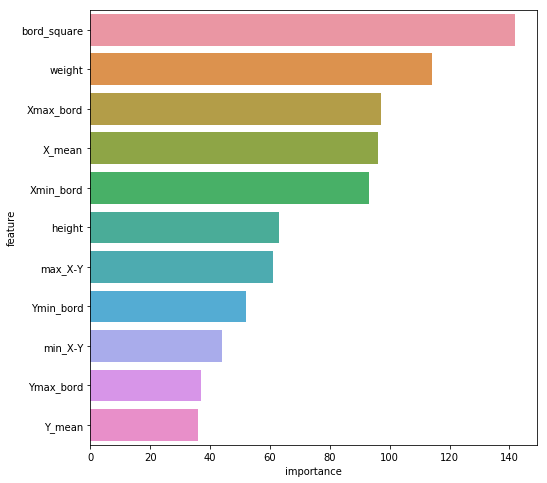

In [307]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance':model.feature_importance()}).sort_values('importance', ascending=False)[:100]

plt.figure(figsize=(8,8))
sns.barplot(x=feature_importance.importance, y=feature_importance.feature);

In [57]:
accuracy_score(v_y, np.where(model.predict(v_x) > 0.5, 1, 0))

0.5555555555555556

In [193]:
def lgb_eval(num_leaves,max_depth,lambda_l2,lambda_l1,min_child_samples, min_data_in_leaf):
    params = {
    "objective" : "regression",
    "metric" : "l1", 
    "num_leaves" : int(num_leaves),
    "max_depth" : int(max_depth),
    "lambda_l2" : lambda_l2,
    "lambda_l1" : lambda_l1,
    "num_threads" : 20,
    "min_child_samples" : int(min_child_samples),
    'min_data_in_leaf': int(min_data_in_leaf),
    "learning_rate" : 0.03,
    "subsample_freq" : 5,
    "bagging_seed" : 42,
    "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(X_train, y_train)
    cv_result = lgb.cv(params,
                       lgtrain,
                       10000,
                       early_stopping_rounds=400,
                       stratified=True,
                       nfold=5)
    return cv_result

def lgb_train():
    params = {
    "objective" : "regression",
    "metric" : "l1", 
    "num_threads" : 20,
    'nthread': 4,
    "verbosity" : 2
    }
    t_x,v_x,t_y,v_y = train_test_split(X_train, y_train,test_size=0.2)
    lgtrain = lgb.Dataset(t_x, t_y)
    lgvalid = lgb.Dataset(v_x, v_y)
    
    #lgtrain = lgb.Dataset(X_train, y_train,categorical_feature=categorical_features)
    #model = lgb.train(params, lgtrain, 4000, verbose_eval=200)


    model = lgb.train(params, lgtrain, 200, valid_sets=[lgvalid], early_stopping_rounds=50, verbose_eval=200)
    pred_test_y = model.predict(X_test, num_iteration=model.best_iteration)
    ttest_data['ymax'] = pred_test_y
    pred_test_y = model.predict(X_train, num_iteration=model.best_iteration)
    quorum['ymax'] = pred_test_y

    return pred_test_y, model
    
def param_tuning(num_iter,**args):
    lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (1, 100),
                                                'max_depth': (1, 20),
                                                'lambda_l2': (0.0, 7),
                                                'lambda_l1': (2.0, 5),
                                                'min_child_samples': (1, 5000),
                                                'min_data_in_leaf': (1, 400)
                                                })

    lgbBO.maximize(n_iter=num_iter,**args)
    return lgbBO

In [86]:
datta['Xmin'] = (datta.Ymax_bord - datta.Ymin_bord)/datta.Xmax_bord

In [182]:
ttest_data['Xmin'] = (ttest_data.Ymax_bord - ttest_data.Ymin_bord)/ttest_data.Xmax_bord

In [142]:
quorum['Xmin'] = (quorum.Ymax_bord - quorum.Ymin_bord)/quorum.Xmax_bord

In [95]:
datta['Xmin'] = datta[datta.hmore == 0].Xmin*2

In [90]:
datta['Xmin2'] = datta.Xmax_bord - datta.bord_square/(datta.Ymax_bord - datta.Ymin_bord)

In [ ]:
X_train = datta.drop(columns = ['Xmin_true','Ymin_true', 'Xmax_true','Ymax_true', 'true_square', 'iou', 'itemId', 'y'])
                #'Xmin_lap', 'Ymin_lap', 'Xmax_lap', 'Ymax_lap', 'bord_more']]

y_train = datta['Ymax_true']
#X_test = ttest_data
pred,model1 = lgb_train()
#data['lgb_%s' %y] = pred

In [192]:
ttest_data.columns

Index(['itemId', 'Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord',
       'Xmin_bordpred', 'Ymin_bordpred', 'Xmax_bordpred', 'Ymax_bordpred',
       'perimeter', 'bord_square', 'weight', 'y', 'Xmin', 'xmin'],
      dtype='object')

In [196]:
X_train = quorum.drop(columns = ['Xmin_true','Ymin_true', 'Xmax_true','Ymax_true', 'itemId', 'y', 'ymax', 'xmin'])
                #'Xmin_lap', 'Ymin_lap', 'Xmax_lap', 'Ymax_lap', 'bord_more']]

y_train = quorum['Ymax_true']
X_test = ttest_data
pred,model1 = lgb_train()
#data['lgb_%s' %y] = pred

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[72]	valid_0's l1: 53.6211


In [197]:
quorum[['xmin', 'Ymin_bord', 'Xmax_bord', 'ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.6472123718028844

In [145]:
datta[['y', 'Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5610204866927903

In [522]:
(datta.weight - datta.height).mean()

74.75701268737652

In [520]:
datta[datta.weight > datta.height].shape

(706, 23)

In [190]:
X_train = data.drop(columns = ['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true'])
                #'Xmin_lap', 'Ymin_lap', 'Xmax_lap', 'Ymax_lap', 'bord_more']]
X_test = test_data.drop(columns = ['Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true'])

for X, y in zip(['Xmin', 'Ymin', 'Xmax', 'Ymax'], \
                ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']):
    #X_train = data[[X+'_bord', X+'_lap']]
    y_train = data[y]
    pred,model1 = lgb_train()
    #data['lgb_%s' %y] = pred
    test_data[y] = pred

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's l1: 40.3949
Early stopping, best iteration is:
[21]	valid_0's l1: 36.4901
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's l1: 34.018
Early stopping, best iteration is:
[69]	valid_0's l1: 32.5066
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's l1: 50.1425
Early stopping, best iteration is:
[115]	valid_0's l1: 49.7932
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's l1: 44.1026
Early stopping, best iteration is:
[78]	valid_0's l1: 43.4527


In [460]:
X_train = data.drop(columns = ['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true', 'true_square'])

                #'Xmin_lap', 'Ymin_lap', 'Xmax_lap', 'Ymax_lap', 'bord_more']]
X_test = test_quorum



y_train = data['Xmin_true']
pred,model1 = lgb_train()
#data['lgb_%s' %y] = pred
test_data[y] = pred

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's l1: 46.878
Early stopping, best iteration is:
[34]	valid_0's l1: 42.1349
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's l1: 38.2211
Early stopping, best iteration is:
[47]	valid_0's l1: 35.609
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's l1: 77.9101
Early stopping, best iteration is:
[41]	valid_0's l1: 75.4179
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's l1: 68.1785
Early stopping, best iteration is:
[43]	valid_0's l1: 63.6562


In [445]:
test_quorum.columns

Index(['Xmax_bord', 'Xmin_bord', 'Ymax_bord', 'Ymin_bord'], dtype='object')

In [117]:
data.columns

Index(['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true', 'Ymax_true',
       'Xmax_lap', 'Xmin_lap', 'Ymax_lap', 'Ymin_lap', 'Xmax_bord',
       'Xmin_bord', 'Ymax_bord', 'Ymin_bord', 'true_square', 'bord_square',
       'lap_square', 'bord_less_true', 'bord_more', 'lgb_Xmin_true',
       'lgb_Ymin_true', 'lgb_Xmax_true', 'lgb_Ymax_true'],
      dtype='object')

In [113]:
test_data.index - test_quorum.index

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='itemId', length=630)

In [112]:
test_quorum.index

Int64Index([   18,    19,    33,    62,   114,   146,   156,   163,   164,
              179,
            ...
            35512, 35514, 35544, 35660, 35682, 35685, 35695, 35966, 35973,
            35978],
           dtype='int64', name='itemId', length=630)

In [78]:
data[['lgb_Xmin_true', 'lgb_Ymin_true', 'lgb_Xmax_true','lgb_Ymax_true', \
      'Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.6574833823710449

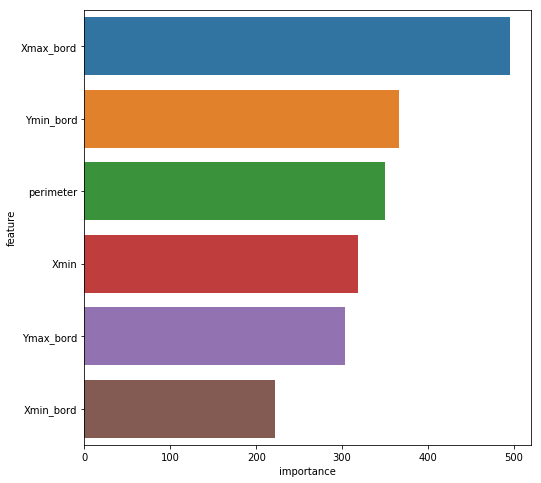

In [190]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance':model1.feature_importance()}).sort_values('importance', ascending=False)[:100]

plt.figure(figsize=(8,8))
sns.barplot(x=feature_importance.importance, y=feature_importance.feature);

In [4]:
votes[['Xmin', 'Ymin', 'Xmax', 'Ymax']].corr()

,Xmin,Ymin,Xmax,Ymax
Xmin,1.000000,0.079259,0.436868,0.174405
Ymin,0.079259,1.000000,-0.216119,0.740552
Xmax,0.436868,-0.216119,1.000000,0.384217
Ymax,0.174405,0.740552,0.384217,1.000000


In [15]:
len(test.userId.unique())

1192

In [16]:
len(votes.userId.unique())

1357

In [138]:
duplicate_users = list(set(votes.userId.unique()) & set(test.userId.unique()))

In [139]:
data = votes.merge(answers, on=["itemId"])

In [141]:
data["iou"] = data[['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [143]:
data = data.sort_values(by=['iou'])

In [156]:
len(data[data.iou > 0.6].userId.unique())

634

In [154]:
len(list(set(data[data.iou > 0.6].userId.unique()) & set(test.userId.unique())))

516

In [40]:
d_user = []
unq_user = []
for user in data.userId:
    if user in duplicate_users:
        d_user.append(user)
    else:
        unq_user.append(user)

In [57]:
dd = pd.DataFrame(index = votes.index)

In [55]:
iou = []

In [50]:
lin = LinearRegression()

In [59]:
for dupl in duplicate_users:
    for X, y in zip(['Xmin', 'Ymin', 'Xmax', 'Ymax'], \
                    ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']):
        df = data[data.userId == dupl]
        print(X)
        print(lin.fit(df[X].values.reshape(-1, 1), df[y]).predict(df[X].values.reshape(-1, 1)))
        dd[y] = y
        

Xmin
[ 32. 283.]
Ymin
[597. 186.]
Xmax
[314. 768.]
Ymax
[784. 622.]
Xmin
[ 81.76965511  86.92891621  68.01162552  63.71224128  80.04990141
 164.31783264 307.05738961  75.75051717  65.43199498  88.6486699
  68.87150237 131.64251237  87.78879306 160.01844839]
Ymin
[ 870.18584164  497.49849062  587.55661658  561.68885699  676.65667736
  958.32783726  600.01146378  295.34673981  348.04032414  481.21138274
  946.83105522  614.38244133 1075.21178796 1056.05048457]
Xmax
[471.30364476 146.22725555 161.23078121 303.26415742 784.37721345
 565.32573887 919.40894435 401.2871917  490.30811059 124.22208459
 314.2667429  427.29330284  70.20939223 351.27543952]
Ymax
[1162.56250049  560.11300798  669.56122768  739.29814642 1363.05614188
 1116.07122132 1166.43677375  467.13044965  904.92332845  570.76725945
 1099.60555995  861.33775423 1086.04560353 1177.09102522]
Xmin
[104.]
Ymin
[965.]
Xmax
[275.]
Ymax
[1076.]
Xmin
[ 52.37978179  45.94292533  96.00736447  28.77797477 106.0202523
 146.07180361 156.7998

[1013.52421311  577.68860057  898.78718632]
Xmin
[55.]
Ymin
[1475.]
Xmax
[57.]
Ymax
[1478.]
Xmin
[101.  35.]
Ymin
[887. 596.]
Xmax
[354. 397.]
Ymax
[1088.  783.]
Xmin
[139.9251837  108.81496326 148.998998    58.26085504]
Ymin
[521.90706698 625.85118393 872.03461881 316.20713028]
Xmax
[527.68746671 618.33639892 339.23310765 781.74302672]
Ymax
[ 820.90587428  959.65328026 1142.68177326  706.75907219]
Xmin
[42.52203949 37.30309729 37.90297571 43.27188751]
Ymin
[1310.57239461  591.48833519 1004.80351304  410.13575716]
Xmax
[224.56351484 518.29211938 494.25977901 132.88458676]
Ymax
[1435.08969944  972.41311566 1408.04388661  574.45329829]
Xmin
[19. 24.]
Ymin
[482. 604.]
Xmax
[303. 503.]
Ymax
[670. 772.]
Xmin
[73.31854942 21.41167958  9.87681961 81.39295139]
Ymin
[ 780.29258163  449.57889418  482.65026292 1081.47826127]
Xmax
[392.1124448  393.19298809 529.34144253 234.35312458]
Ymax
[ 977.82218667  687.22395115  872.05675112 1324.89711107]
Xmin
[ 99.80408859  35.50085179  51.57666099 137.314

[ 73.24139999 101.14515991 105.51562833 137.78985667  73.57758987
  71.89664047  63.82808339  80.30138744  84.33566598  81.64614695
  72.90521011  97.11088137 121.6527425  102.48991942  72.56902023
 123.66988177  69.8795012   95.09374209  69.54331132  66.18141254
  77.94805829  71.89664047  63.15570363  63.82808339 122.32512226
  75.59472914  68.53474169  89.04232428 112.57561578 107.86895748
  94.08517246 144.17746437  74.92234938  84.67185586]
Ymin
[ 876.26433761  790.60299178  836.42185118  537.60320295 1099.38226161
  871.2840268   546.5677624   145.15471162  487.80009491 1019.69728875
  641.19366767  522.66227054  747.77231887  366.2805113   930.05169429
  856.34309439  619.28030013  941.00837805  842.39822414  508.71740029
  769.68568641  960.92962127  480.82765979  399.15056261 1019.69728875
  973.87842936  550.55201104  482.81978411  738.80775942  690.99677571
  338.3907708   731.8353243   935.03200509  965.90993207]
Xmax
[332.21059972 464.84725229 339.9620924  664.6635081  124

[854.]
Xmax
[282.]
Ymax
[1018.]
Xmin
[69.38751198 65.95803095 71.65445707]
Ymin
[267.53729386 902.95645741 192.50624872]
Xmax
[820.71824641 194.90980907 696.37194453]
Ymax
[959.29560087 909.39108991 808.31330922]
Xmin
[43.61837295 72.49481954 72.88680751]
Ymin
[522.92059069 745.62607969 859.45332962]
Xmax
[965.80446324 585.2686684  321.92686835]
Ymax
[1117.0960709  1174.49346813 1049.41046097]
Xmin
[108.98086382 103.46411823 233.1076396  119.0948974  120.9338126
  90.59171185 154.95374374 220.23523323  94.26954224  99.78628783
 107.14194862 102.54466063  98.86683023  82.31659346 157.71211653]
Ymin
[1025.9243518   523.82317138  299.22522784 1009.95294248  105.57188987
  824.28530916  886.17452027  610.66770954  562.75348159 1466.13632112
  391.06083142  695.51582154  744.42826258  511.84461439  628.63554502]
Xmax
[127.78689211 884.09680958 750.21310789 169.45930257 770.60598961
 291.81659285 341.46882659 548.94423185 269.65041707  88.77442274
 266.99047598 743.11993165 537.41782044 188.

[413.57775081  82.7150166  407.3497464   94.39252487 710.96496132]
Ymax
[1884.46369013  468.50390325 1517.28929705  841.64861167  953.09449791]
Xmin
[87.20222932 89.38617915 83.65206429 83.53239581 88.73797486 82.98391526
 82.50524132]
Ymin
[591.5301883  726.49281909 325.75762304 650.360053   973.57825085
 896.06125265 601.21981307]
Xmax
[683.62304416 909.84295748 481.96999925 472.7574236  842.28406934
 488.11171636 544.41078981]
Ymax
[ 811.56744759 1021.4210473   547.1090847  1149.90284303 1401.51302635
 1425.06802224 1127.41852878]
Xmin
[41.14350572 41.17859082 36.58244253 25.95165679 37.14380415]
Ymin
[ 814.49644243 1023.6788827   375.21331787 1035.00959821  691.60175878]
Xmax
[340.4036082   95.12674945 346.80213495 877.8798552  988.7876522 ]
Ymax
[1100.58428205 1251.71172874  624.14860264 1477.12215771 1323.43322887]
Xmin
[46.]
Ymin
[793.]
Xmax
[89.]
Ymax
[824.]
Xmin
[ 18.32718894 377.92165899  85.75115207]
Ymin
[659.14392679 669.90183028 400.95424293]
Xmax
[657. 842. 657.]
Ymax
[9

[ 871.61994958 1048.15125707  909.22879335]
Xmin
[34.17955801 18.11878453 16.70165746]
Ymin
[651.66543256 246.22281871 237.11174874]
Xmax
[337.99060439 479.26520526 581.74419034]
Ymax
[954.26379831 704.1325329  804.60366879]
Xmin
[107.50035302  63.35408331 121.14556366]
Ymin
[803.63810962 945.13854122 762.22334916]
Xmax
[271.05953834 131.19999432 360.74046733]
Ymax
[ 960.58586813 1008.79737389  914.61675798]
Xmin
[ 87.337242    82.66070075  82.20071309  91.47713097  84.4239868
  85.26729751  85.49729134  82.89069458  83.27401764 122.44963363
  83.35068225  83.19735303  86.18727284  82.04738387  89.86717414
  84.57731602  82.89069458  89.94383876  82.89069458  84.11732835
  90.94047869  88.33388193  89.17719265]
Ymin
[ 499.53657249  685.6371772   592.58687484  612.22134231  483.31679501
  746.2479246   783.80951454  737.71119961  813.688052    831.61517447
  658.31965724  473.92639753  307.46026029  679.66146971  424.4133926
  960.51972177 1108.20506404  391.97383765  713.80836965  819.

[330.78552776 312.26207719 343.75194316 976.32778011 379.87267177]
Ymax
[ 898.70265596 1011.92554729  720.63392687  764.89378439  815.84408549]
Xmin
[22.]
Ymin
[353.]
Xmax
[291.]
Ymax
[527.]
Xmin
[120.6323185  106.79156909  67.57611241]
Ymin
[415.17426069 764.4893629  573.33637641]
Xmax
[336.20820615 707.98796641 337.80382744]
Ymax
[ 759.67608036 1162.1482046   694.17571504]
Xmin
[83.]
Ymin
[1204.]
Xmax
[321.]
Ymax
[1656.]
Xmin
[151.10526316  89.73684211 243.15789474]
Ymin
[407.17405672 816.83857609 914.98736719]
Xmax
[449.31887791 542.14473937 726.53638273]
Ymax
[ 665.1668125  1254.32410998 1336.50907753]
Xmin
[276.]
Ymin
[764.]
Xmax
[405.]
Ymax
[1001.]
Xmin
[79.6067178  51.18645861 91.20682359]
Ymin
[ 475.45209709  512.6975479  1146.85035501]
Xmax
[309.25513532  55.48044888 114.2644158 ]
Ymax
[ 666.58542571  530.28585639 1184.1287179 ]
Xmin
[10.]
Ymin
[305.]
Xmax
[231.]
Ymax
[571.]
Xmin
[119.72142316  62.01589705  45.26267979]
Ymin
[410.3831897  652.09334175 989.52346854]
Xmax
[591.1

Xmin
[ 77.6284743   65.09869456 105.00122389  72.71294533  70.59252106
  65.96614085]
Ymin
[454.29910602 526.44018723 555.52933289 389.13941976 981.39442522
 930.19752888]
Xmax
[568.68295049 261.55991507 900.61207724 806.11268172 255.65370285
 260.37867263]
Ymax
[ 882.50820623  815.97902124  961.20736409  970.94334238 1112.92635913
 1106.43570693]
Xmin
[ 1.12000000e+02 -2.84217094e-14]
Ymin
[578.  57.]
Xmax
[217. 749.]
Ymax
[700. 519.]
Xmin
[39.]
Ymin
[294.]
Xmax
[618.]
Ymax
[695.]
Xmin
[175.]
Ymin
[591.]
Xmax
[673.]
Ymax
[922.]
Xmin
[63.37277712 59.49636929 70.32357736 32.89619146 51.2088767  52.67923829
 72.06127742 58.96169235]
Ymin
[286.92530974 514.83929406 764.98878904 131.27673508 430.34435353
 429.23257799 724.96486984 570.42807072]
Xmax
[607.22430568 581.67454168 328.30604873 945.75867861 629.58034917
 667.90499517 243.14016875 478.4109122 ]
Ymax
[915.49896258 887.72821698 913.76329098 828.96333566 861.94109606
 905.82879224 898.39019966 898.88610584]
Xmin
[273.]
Ymin
[567.]
X

Ymax
[1387.64428083 1090.3728975   606.24521609 1146.64212363  693.30326406
  502.20023192  916.25680155  814.33518441]
Xmin
[107.60354944  32.86848559 110.52796498]
Ymin
[596.796871   933.44657159 336.75655741]
Xmax
[101.28479376 608.58397119 568.13123506]
Ymax
[ 688.52018608 1416.70975245  897.77006147]
Xmin
[133.14395812  23.6055607   98.25911818  18.02398631 218.96066438
  66.16506543  77.32821421  51.51343266]
Ymin
[ 753.70379378  641.05593865  436.76237086  590.45986812  966.58914713
  497.85951263  735.56557982 1021.00378902]
Xmax
[718.22099053  86.85336817 356.82923917 795.11285253 463.62349194
 481.5649264  209.02599334 462.76913792]
Ymax
[1416.74068287  579.30708063  738.34491607 1293.73485702 1226.6407702
  861.35074192  832.77363086 1480.10732043]
Xmin
[ 45.88716044 208.0364499   47.29715426  49.64714396  24.73725312
  33.66721399 132.36678148  83.01699773 173.2566023   27.08724282]
Ymin
[588.65255004 532.66230539 987.37095892 345.17981951 360.44988624
 665.8512207  486.852

[ 721.98996033  734.49503282 1175.29883807 1074.21616878]
Xmin
[28.]
Ymin
[565.]
Xmax
[490.]
Ymax
[942.]
Xmin
[269.47790898  65.6821736  100.83991742]
Ymin
[684.49298157 327.9664353  710.54058313]
Xmax
[795.97430947 380.09474309 584.93094743]
Ymax
[1015.1619668   578.42124077  896.41679244]
Xmin
[ 56.94407557  36.27978408  50.86634278 124.40690958  82.47055331
  64.84512821 106.1737112  145.67897436  98.88043185  89.15605938
  71.53063428  58.76739541]
Ymin
[ 580.49302838  492.21899636  677.89885682  396.84245601  314.65628826
  881.84231012  214.20652769  586.58089266  606.87377358  301.46591566
  782.40719358 1205.51376087]
Xmax
[375.14834293 206.01766947 541.24528234 774.08437093 692.17355149
 312.95679484 783.18557309 588.26816017 504.08204019 522.28444451
 643.63380664 601.91996341]
Ymax
[ 876.06520504  564.72692681  977.68897538 1025.72930318  907.4761886
  986.0036475   753.19282817 1038.66323759  812.31938546  712.54332004
 1169.85028657 1680.74069565]
Xmin
[20.  5.]
Ymin
[530.

Ymax
[716.0992332  861.92129003 924.97947677]
Xmin
[21. 74.]
Ymin
[494. 754.]
Xmax
[297. 240.]
Ymax
[672. 869.]
Xmin
[41. 79.]
Ymin
[780. 825.]
Xmax
[360. 400.]
Ymax
[1103. 1019.]
Xmin
[46.]
Ymin
[793.]
Xmax
[89.]
Ymax
[824.]
Xmin
[53.]
Ymin
[937.]
Xmax
[259.]
Ymax
[1074.]
Xmin
[ 34.16504854 103.74271845  91.09223301]
Ymin
[ 451.23526446 1208.35932445  805.40541108]
Xmax
[ 72.24192963 355.17772942  77.58034095]
Ymax
[ 470.86286209 1548.42926292  870.70787499]
Xmin
[198.]
Ymin
[815.]
Xmax
[581.]
Ymax
[1198.]
Xmin
[ 67.39431767  64.5708669   66.99096756  65.37756712  66.58761745
  82.31827169  67.39431767 115.79633072  74.65461962  69.0077181
  61.34406603  98.85562615  62.15076625  63.76416669  73.04121919
  91.19197408  81.91492158  58.11726516  66.18426734 114.9896305
  75.86466995  79.89817104  88.36852332 121.44323224 155.72799149
  63.76416669  93.61207474  74.25126952  80.30152115 179.12229779
  85.54507256  85.14172245  61.34406603  62.15076625  62.55411636
  65.78091723  84.3350

Ymax
[1656.  605.]
Xmin
[83.13831173 87.61378884 80.34113854 80.62085586 82.43901843 82.43901843
 77.96354133 89.29209275 89.15223409]
Ymin
[657.38293193 976.15744007 336.67058483 806.59653148 177.7677905
 363.8003302  510.10717133 547.89503095 774.62218872]
Xmax
[926.76942263 129.67791997 356.96945227 248.03710499 652.34370161
 917.34258488 522.46282601 245.94225216 566.45473549]
Ymax
[1105.76970455 1104.87349741  633.46854082 1095.01521885  646.91164795
  998.22484753  788.51237635  792.09720492 1163.12696162]
Xmin
[ 81.10250368 157.51958763 113.02356406 125.59852725 127.53313697
  72.39675994  76.26597938  77.23328424  52.08335788  99.48129602
 120.76200295]
Ymin
[763.37152373 313.52347097 649.12439922 738.37996525 407.24181529
 490.2494917  711.60329544 805.32163977 170.71456533 901.71765107
 693.75218223]
Xmax
[824.59015867 627.06121928 162.99759748 172.48588714 368.28968296
 943.62506537 609.80978352 366.56453938 878.93218129 350.17567542
 260.46820949]
Ymax
[1285.54667322  507.0

  32.72083566]
Ymin
[ 717.83722722  781.50508324 1008.89028335  810.61038886  516.82871033
  240.32830701]
Xmax
[271.90939656 295.70813369 219.73524209 660.927215   318.59153478
 637.12847788]
Ymax
[ 853.7183427   911.90188246 1179.78859676 1309.48940413  653.71242478
 1000.38934917]
Xmin
[43.78241485 57.91352584 31.91228161 36.99948157 45.47814817 70.91414796]
Ymin
[ 714.83562263 1031.67287645  763.80138004  554.49676995  522.81304456
  244.38030636]
Xmax
[263.74256771 215.80260336 620.24157532 179.19390331 313.42580349
 658.5935468 ]
Ymax
[ 881.60714827 1196.79496003 1314.04482601  631.97840135  672.32244125
  957.25222309]
Xmin
[ 78.98635461  78.86074961 144.55216159  78.35832964  80.24240455]
Ymin
[649.59102499 541.01209095 494.80828923 127.48806554 765.1005293 ]
Xmax
[160.97295608 174.62340858 925.39829595 832.57521896  75.43012043]
Ymax
[ 744.77724182  583.20710106 1104.94401392  788.5358216   788.5358216 ]
Xmin
[98.22627003 58.00176192 52.87762076 67.65222778 78.24211951]
Ymin
[

[754.]
Ymax
[926.]
Xmin
[59.21230707 51.45719601 51.86110804 55.46938888]
Ymin
[472.97598946 329.80889725 482.7931615  556.42195178]
Xmax
[646.88763742 218.54899516 700.87004165 442.69332577]
Ymax
[ 749.42840986  538.42844739 1088.46233013  886.68081262]
Xmin
[35.77742699 46.04893449 59.17363852]
Ymin
[395.2363711  997.04752305 671.71610585]
Xmax
[501.8160685  204.79675453 219.38717697]
Ymax
[ 865.84419613 1051.79442855  771.36137533]
Xmin
[111.38557792  86.78469338 134.18639774  15.98214763 229.58982803
   9.38191032  81.38449922  23.7824281   46.58324791 190.58842571
  27.98257912  62.18380884  80.18445607]
Ymin
[1116.77224678  821.71975964  733.02838702  625.01810155 1136.96929203
  387.92235296  431.82897307  832.25734847  652.24020602  905.14233785
  591.64907027  545.98618536  715.46573898]
Xmax
[591.95039072 428.86159754 883.53338458 115.53343126 790.62219331
 165.94269461 442.69943454  98.73034348 518.80753802 507.93495181
  98.73034348 627.53340014 236.12029652]
Ymax
[1549.127

[ 793.98106338  965.2538467  1325.76508991]
Xmin
[21. 16.]
Ymin
[494. 517.]
Xmax
[297. 693.]
Ymax
[ 672. 1453.]
Xmin
[77.]
Ymin
[1168.]
Xmax
[459.]
Ymax
[1611.]
Xmin
[84.18570271 86.0018226  84.61583637 87.19663832]
Ymin
[ 745.23983052  392.71847399 1016.87101742  796.17067806]
Xmax
[612.11776128 873.09075665 438.55805076  57.23343131]
Ymax
[1024.87701747 1067.39661579 1131.80130147  857.92506526]
Xmin
[221.]
Ymin
[439.]
Xmax
[508.]
Ymax
[592.]
Xmin
[32.]
Ymin
[980.]
Xmax
[382.]
Ymax
[1423.]
Xmin
[38.58634585 37.06916166 35.6899033  58.30974034 31.4142024  29.62116654
 33.89686744 58.58559201 55.41329779 29.34531487 57.06840782]
Ymin
[ 520.59603434  795.33184265  437.64009223  616.93196713  707.02390427
  144.17229699  437.64009223  277.97220363  975.51571693  327.92416878
 1027.25168083]
Xmax
[295.31706872 437.6037855  140.09519588 414.32050457 632.92464216
 790.73354622 255.2180849  869.63799825 506.16011267  50.84261899
 409.14644214]
Ymax
[ 798.77807233 1190.10811872  556.63543366 

[891.33175467 419.091946   315.62367331 551.74357765 915.20904837]
Xmax
[514.31685709 284.45724483 659.11828684 866.70075606 280.40685519]
Ymax
[1174.37285324  685.23581524  683.4826359  1024.47601901 1138.43267661]
Xmin
[111.75755976 117.38031319 144.6506673   94.04588647  88.42313304
 140.99587757  97.13840085  94.60816181]
Ymin
[ 694.32397682  402.98625684  609.71104164  489.52221327  454.90783069
  693.36246619 1474.10909532 1250.07711923]
Xmax
[601.95935298 647.87131832 527.00104223 779.98534101 706.90098803
 827.77126412  75.37721996  64.13347335]
Ymax
[1101.57722026  735.40395769 1083.05059685 1015.4829115   869.44952702
 1126.64265192 1425.24822914 1169.14490561]
Xmin
[ 49. 121.]
Ymin
[328. 711.]
Xmax
[410. 526.]
Ymax
[575. 909.]
Xmin
[32.]
Ymin
[707.]
Xmax
[583.]
Ymax
[1118.]
Xmin
[32.]
Ymin
[424.]
Xmax
[507.]
Ymax
[701.]
Xmin
[128.70753717  57.14671512  82.67752924  82.30481663  95.16340184]
Ymin
[531.94579726 582.89500723 469.75779097 835.39329783 971.00810672]
Xmax
[482.821

Xmin
[19.8756555  20.91902942 15.20531508]
Ymin
[628.53676526 555.36562053 308.09761421]
Xmax
[582.83911066 792.63248757 303.52840177]
Ymax
[1208.15375526 1034.41530818  506.43093656]
Xmin
[32. 97.]
Ymin
[577. 255.]
Xmax
[ 41. 990.]
Ymax
[585. 778.]
Xmin
[ 11.89370288 175.34821032  58.6795945   58.6795945   59.27182098
  27.29159126  41.50502669  24.33045888]
Ymin
[ 468.17966689  274.86749313  345.64298844  778.74676573 1000.58040775
  864.31117051  682.61885418  447.05265337]
Xmax
[726.97427639 638.20026787 197.53892439 906.66142616 190.05195982
  84.16488942 262.78247282 106.62578314]
Ymax
[ 970.01768697  633.89679979  503.56421088 1555.04442063 1100.35027588
  918.08064026  846.544708    555.50125759]
Xmin
[ 28. 143.]
Ymin
[567. 869.]
Xmax
[506. 307.]
Ymax
[ 926. 1001.]
Xmin
[19. 24.]
Ymin
[482. 604.]
Xmax
[303. 503.]
Ymax
[670. 772.]
Xmin
[191.5752339   13.81356315 300.61120295]
Ymin
[1003.07631609  580.11053671  591.81314721]
Xmax
[903.01117936 394.21624683 909.77257381]
Ymax
[141

[1215.29888712  848.80517416  887.25697355 1151.61309438 1458.02587079]
Xmin
[153.]
Ymin
[861.]
Xmax
[470.]
Ymax
[1172.]
Xmin
[65.]
Ymin
[715.]
Xmax
[100.]
Ymax
[744.]
Xmin
[ 55. 253.]
Ymin
[239. 542.]
Xmax
[875. 723.]
Ymax
[ 900. 1003.]
Xmin
[ 99.06892961 138.16930446   3.76176593]
Ymin
[571.6271866  932.73705302  59.63576038]
Xmax
[197.19361746 363.55336367 740.25301888]
Ymax
[ 600.50027227 1192.19261246  622.30711527]
Xmin
[83. 10.]
Ymin
[1042.  274.]
Xmax
[314. 826.]
Ymax
[1237.  811.]
Xmin
[55.]
Ymin
[239.]
Xmax
[875.]
Ymax
[900.]
Xmin
[109. 120.]
Ymin
[791. 772.]
Xmax
[333. 323.]
Ymax
[995. 897.]
Xmin
[27.]
Ymin
[651.]
Xmax
[324.]
Ymax
[922.]
Xmin
[53.0072997  52.39374562 61.9038338  85.52566573 76.32235459 99.02385541
 52.70052266 69.26648271 77.85623978]
Ymin
[669.46813336 329.60922217 232.65247573 577.61437358 191.82858249
 430.64835793 484.74001647 459.22508319 508.21375508]
Xmax
[383.86861317 669.04225273 788.66206798 696.79404987 898.71229801
 469.03792163 466.16704607 655.

Ymax
[689. 984.]
Xmin
[250.]
Ymin
[202.]
Xmax
[745.]
Ymax
[644.]
Xmin
[145.]
Ymin
[383.]
Xmax
[479.]
Ymax
[685.]
Xmin
[128.12178025 134.86451478  91.23505607  50.77864891]
Ymin
[568.88069278 173.29285144 889.40216664 914.42428914]
Xmax
[403.86439602 804.10324815 561.16350821   8.86884763]
Ymax
[ 814.98784604  679.47155981 1211.92562059 1046.61497356]
Xmin
[91. 26.]
Ymin
[526. 608.]
Xmax
[507.  38.]
Ymax
[833. 615.]
Xmin
[151.]
Ymin
[787.]
Xmax
[732.]
Ymax
[1457.]
Xmin
[345.  61.]
Ymin
[476. 795.]
Xmax
[927. 676.]
Ymax
[ 834. 1523.]
Xmin
[65.49327354 68.23766816 67.2690583 ]
Ymin
[351.84966486 226.86690073 641.28343441]
Xmax
[183.51891741 606.55498816 480.92609442]
Ymax
[394.54966815 675.09499672 906.35533513]
Xmin
[153.93870571 287.9278612  100.05946858 117.07396451]
Ymin
[303.07148517 436.38582474 555.11890841 462.42378168]
Xmax
[630.92285097 715.81364324  42.75093308 172.5125727 ]
Ymax
[653.95976335 832.10875766 507.18291897 521.74856002]
Xmin
[60.88793103 55.43226601 34.70073892 61.

Ymax
[ 837.76769913  910.86442951  999.28789367  874.31606432 1989.63069235
  980.42422132  603.1507742   945.05483565  677.4264841   659.74179127
  821.26198582 1057.05789026 1037.01523839]
Xmin
[71.80501931 48.40733591 95.78764479]
Ymin
[259.39983302 640.00143791 303.59872907]
Xmax
[327.65328132 145.49311611 681.85360257]
Ymax
[581.28569335 728.30987484 686.40443181]
Xmin
[70.48318043 76.40978593 20.10703364]
Ymin
[724.44501718 548.40893471 640.14604811]
Xmax
[383.74427904 350.63657888  67.61914208]
Ymax
[910.34615385 728.61538462 668.03846154]
Xmin
[156.  42.]
Ymin
[330. 505.]
Xmax
[622.  93.]
Ymax
[614. 577.]
Xmin
[29.]
Ymin
[679.]
Xmax
[908.]
Ymax
[1331.]
Xmin
[148.27308399  76.24817878 187.05572526  58.83556433  45.38036226
  20.84440554 121.36267985]
Ymin
[ 620.72089535 1102.56699463 1021.66443969  463.67475928  732.55678012
  765.86959686  640.94653408]
Xmax
[587.77407399 268.87427181 865.73403671 415.39580254 530.67377157
  53.40143249 746.14661089]
Ymax
[ 975.74453619 1206.97

Xmax
[346.]
Ymax
[1122.]
Xmin
[ 82.91147751 318.98191132 -19.89338883]
Ymin
[599.2195838  540.54623953 522.23417667]
Xmax
[830.90163934 819.37704918 980.72131148]
Ymax
[1138.80066142  846.30664842 1222.89269016]
Xmin
[94.95934172 75.07163601 48.96902227]
Ymin
[ 730.58375982  454.08480174 1071.33143845]
Xmax
[238.00388234 413.86202777 635.13408989]
Ymax
[ 905.41013364  701.10226542 1537.48760094]
Xmin
[176.  44.]
Ymin
[688. 847.]
Xmax
[542. 346.]
Ymax
[ 942. 1122.]
Xmin
[42.55594703 43.60825965 36.71453817 42.66332587 43.45792928]
Ymin
[ 761.21799027  805.67270474 1050.17363429  663.55232971  777.38334099]
Xmax
[419.7714724   99.39943831 919.79137608 258.08838977  73.94932345]
Ymax
[ 948.56475194  907.78277997 1844.56866546  706.27185966  841.81194297]
Xmin
[11.]
Ymin
[285.]
Xmax
[290.]
Ymax
[491.]
Xmin
[49.  8.]
Ymin
[890. 220.]
Xmax
[280. 909.]
Ymax
[1012.  919.]
Xmin
[10.]
Ymin
[305.]
Xmax
[231.]
Ymax
[571.]
Xmin
[74. 92.]
Ymin
[856. 588.]
Xmax
[360. 249.]
Ymax
[1116.  730.]
Xmin
[49

[146.94155334  37.03459122 242.02385544]
Ymin
[680.3484817  424.50068488 594.15083342]
Xmax
[720.35205991 270.7591287  736.8888114 ]
Ymax
[1296.52605249  553.2844433  1028.18950421]
Xmin
[51.19141777 46.08022394 45.94916768 40.18269259 49.61874274 51.97775528]
Ymin
[563.34586815 845.86391721 345.94350326  64.47570718 820.65784591
 842.71315829]
Xmax
[258.96466644 261.90444995 268.76394482 973.33206077  94.33678955
  76.69808846]
Ymax
[835.17722021 990.02281152 624.08429872 680.9933622  829.22162054
 836.5006868 ]
Xmin
[71.60870092 74.90487155 74.59585555 74.28683955 72.9992729  76.60445952]
Ymin
[ 400.88038348  423.64533526  808.75243619 1080.98331789  547.90403039
  917.8344968 ]
Xmax
[413.0995216  347.66198909 304.03696742 164.13603586 373.9874332
 580.07805282]
Ymax
[ 678.58580574  700.31352873 1056.23432441 1199.01650407  833.78382711
 1290.06600994]
Xmin
[40.]
Ymin
[576.]
Xmax
[61.]
Ymax
[584.]
Xmin
[155.]
Ymin
[1332.]
Xmax
[305.]
Ymax
[1489.]
Xmin
[ 60.94439561 133.55262827  90.1

[ 819.02856005 1492.12570261  737.35944009  692.48629725]
Xmin
[37.]
Ymin
[388.]
Xmax
[751.]
Ymax
[934.]
Xmin
[212.]
Ymin
[170.]
Xmax
[904.]
Ymax
[713.]
Xmin
[149.  60.]
Ymin
[1000.  850.]
Xmax
[767. 360.]
Ymax
[1457. 1190.]
Xmin
[212.39608223  44.99956948  26.60434829]
Ymin
[186.92632386 529.67314196 741.40053418]
Xmax
[567.04437431 294.0987823  536.85684339]
Ymax
[710.78594844 865.58846461 898.62558696]
Xmin
[25.5002881  24.60803803 27.49611063 26.41601844 26.9795448 ]
Ymin
[591.85931061 391.89743417 447.76913494 147.82632029 775.64779999]
Xmax
[265.19309603 365.93142277 984.75257277 816.85536153 470.2675469 ]
Ymax
[ 959.45238277  937.77674861  992.64319758  754.21122181 1199.91644924]
Xmin
[177.69516743 236.4264835   11.12930381  72.74904526]
Ymin
[ 822.94651693  567.35208347  333.22758242 1075.47381719]
Xmax
[381.53526869 943.04741185 682.76313715 260.65418231]
Ymax
[ 922.55542096 1116.67986681  751.85978754 1171.90492469]
Xmin
[120.65593541  62.9917273   48.36051032  85.36888269  

[78.45628998 28.88272921 54.66098081]
Ymin
[739.84088876 704.83749941 803.32161183]
Xmax
[228.7745951  108.65118458 215.57422032]
Ymax
[ 872.73923374  729.33739234 1011.92337392]
Xmin
[66.74718412 53.19248355 73.06033233]
Ymin
[752.64561265 608.80042049 343.55396686]
Xmax
[426.57771529  42.41210878 336.01017593]
Ymax
[923.53439205 627.15118399 552.31442396]
Xmin
[ 27.87266103 185.17529186  56.53669598 114.56388869  11.09371374
  39.75774869]
Ymin
[653.24883952 831.52035207 640.51516006 485.75197884 308.4599801
 784.50368942]
Xmax
[246.21043234 524.37895789 226.65865099 462.16874451 617.69427797
 184.88893629]
Ymax
[ 804.75138449 1169.42451695  773.71537322  798.93213238  918.22680071
  894.94979225]
Xmin
[86.15312814 89.37752926 87.20105851 86.79800837 69.46685233 87.20105851
 76.80236488]
Ymin
[ 828.40030147  553.75246022  629.48256351  254.87098592  298.28957847
 1078.81450967  412.38960075]
Xmax
[326.58101441 316.49027426 178.58349221 353.48965481 647.24231253
  49.64625695 801.9669

In [151]:
for y in ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']:
    pos_data['log' + y] = np.log(pos_data[y])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [338]:
pos_data = data[['Xmin_bord', 'Ymin_bord', 'Xmax_bord','Ymax_bord', \
                 'Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']]
pos_data = pos_data[(pos_data.Xmin_true < 300) & (pos_data.Xmin_true > 0)]

In [152]:
for y in ['Xmin_bord', 'Ymin_bord', 'Xmax_bord','Ymax_bord']:
    pos_data['log' + y] = np.log(pos_data[y])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [294]:
gen.logXmin_bord = gen.logXmin_bord + 1

In [324]:
for X, y in zip(['Xmin_bord', 'Ymin_bord', 'Xmax_bord','Ymax_bord'], 
               ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']):
    pos_data['pred_' + y] = lin.fit(pos_data[X].values.reshape(-1, 1), pos_data[y]).\
    predict(pos_data[X].values.reshape(-1, 1))


In [221]:
X_train = data.drop(columns = ['itemId', 'Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'bord_square'])

In [218]:
X_train.head()

,itemId,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,X_mean,Y_mean,true_square,height,weight,max_X-Y,min_X-Y
6,64,244,22,564,417,133.0,490.5,30098,222,147,-320,-395
7,78,617,49,707,194,333.0,450.5,437668,568,513,-90,-145
8,90,474,35,608,269,254.5,438.5,37570,439,339,-134,-234
9,118,188,47,1372,1269,117.5,1320.5,12707,141,103,-1184,-1222
10,137,781,59,1194,724,420.0,959.0,446796,722,470,-413,-665


In [220]:
X_test.head()

,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,X_mean,Y_mean,height,weight,max_X-Y,min_X-Y,true_square
0,,,,,,,,,,,
18,764,126,1132,634,445.0,883.0,638,498,-368,-508,67643.591729
19,119,27,729,559,73.0,644.0,92,170,-610,-532,20910.299695
33,414,21,652,380,217.5,516.0,393,272,-238,-359,24386.930956
62,639,35,1262,824,337.0,1043.0,604,438,-623,-789,25539.757658
114,216,41,780,570,128.5,675.0,175,210,-564,-529,21566.535454


In [222]:
X_test = test_data.drop(columns = ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true', 'bord_square'])
for y in ['Xmin_true', 'Ymin_true', 'Xmax_true','Ymax_true']:
    test_data[y] = lin.fit(X_train, data[y]).\
    predict(X_test)

In [326]:
pos_data.head()

,Xmin_bord,Ymin_bord,Xmax_bord,Ymax_bord,Xmin_true,Ymin_true,Xmax_true,Ymax_true,pred_Xmin_true,pred_Ymin_true,pred_Xmax_true,pred_Ymax_true
0,151,914,511,1331,198,827,649,1340,116.254833,916.518106,492.267241,1310.401973
1,72,559,427,858,26,605,433,847,80.598494,569.243907,413.846632,844.595631
2,46,600,621,981,233,698,622,920,68.863496,609.351631,594.960897,965.724976
3,65,353,324,491,61,368,329,530,77.439071,367.727047,317.688027,483.177181
4,9,279,388,884,30,536,328,813,52.163691,295.337496,377.437063,870.200208


In [744]:
qu[['Xmin_bord','Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.7304997232645876

In [318]:
data[data.Xmin_true < 300][['Xmin_bord','Ymin_bord', 'Xmax_bord', 'Ymax_bord', 'Xmin_true',\

                            'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.58321689005587

In [471]:
data[['Xmin_bord','pred_Ymin_true', 'pred_Xmax_true', 'pred_Ymax_true', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1).mean()

0.5588342221240228

In [344]:
data.Ymax_true.max()

1949

In [348]:
min(-data.Xmax_true + data.Xmin_true)

-1025

In [350]:
min(data.Ymin_true - data.Ymax_true)

-997

In [468]:
len(set(test.itemId))

630

In [469]:
len(set(test.itemId) - set(votes.itemId))

630

In [811]:
qu.head()

,itemId,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,18,78.500000,584.500000,694.000000,1189.000000
1,19,49.000000,573.000000,232.000000,683.000000
2,33,19.666667,325.666667,330.666667,593.333333
3,62,63.000000,897.285714,579.142857,1308.571429
4,114,73.000000,539.333333,229.000000,694.000000


In [2]:
sub5 = pd.read_csv('submission5.csv', names = ['Xmin_true','Ymin_true', 'Xmax_true','Ymax_true'])

In [57]:
sub15 = pd.read_csv('submission15.csv', names = ['Xmin_true','Ymin_true', 'Xmax_true','Ymax_true'])

In [446]:
sub27 = pd.read_csv('submission27.csv', names = ['Xmin_true','Ymin_true', 'Xmax_true','Ymax_true'])

In [816]:
sub5.Xmin_true.mean()

83.77844415745018

In [63]:
sub15.Xmin_true.mean()

79.46266736772597

In [120]:
sub15.Xmin_true = sub15.Xmin_true + 4

In [181]:
test_data.head()

,Xmax_bord,Xmin_bord,Ymax_bord,Ymin_bord,bord_square,X_mean,Y_mean,height,weight,max_X-Y,min_X-Y,true_square,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,,,,,,,,,,,,,,,,
18,764,126,1132,634,317724,445.0,883.0,638,498,-368,-508,67643.591729,1.633686e+16,7.914047e+16,-9.093087e+16,3.804037e+16
19,119,27,729,559,15640,73.0,644.0,92,170,-610,-532,20910.299695,5.299859e+15,2.567405e+16,-2.949899e+16,1.234072e+16
33,414,21,652,380,106896,217.5,516.0,393,272,-238,-359,24386.930956,5.913605e+15,2.864721e+16,-3.291509e+16,1.376983e+16
62,639,35,1262,824,264552,337.0,1043.0,604,438,-623,-789,25539.757658,6.344701e+15,3.073556e+16,-3.531457e+16,1.477363e+16
114,216,41,780,570,36750,128.5,675.0,175,210,-564,-529,21566.535454,5.425880e+15,2.628453e+16,-3.020042e+16,1.263416e+16


In [160]:
sub5.head()

,Xmin_true,Ymin_true,Xmax_true,Ymax_true
18,77.732082,643.482742,729.108808,1112.907586
19,58.607804,570.177553,126.413291,717.387702
33,65.735944,395.222502,402.064729,641.816905
62,74.428797,829.189221,612.307351,1240.494645
114,66.605229,580.928981,217.051221,767.441087


In [200]:
test_data.Xmin_true = sub5.Xmin_true

In [227]:
sub5.Xmin_true.mean()

83.77844415745018

In [229]:
test_data.Xmin_true.mean() - sub5.Xmin_true.mean()

8857725112842621.0

In [248]:
sub5.Xmin_true = test_data.Xmin_true / 88577251128426.0

In [475]:
test_data.Xmin_bordpred.min()

22.51069148791223

In [476]:
sub27.Xmin_true.min()

27.58804976176546

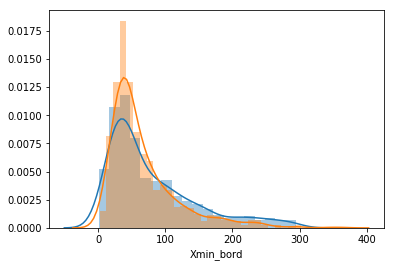

In [54]:
sns.distplot(datta.Xmin_true)
sns.distplot(datta.Xmin_bord);

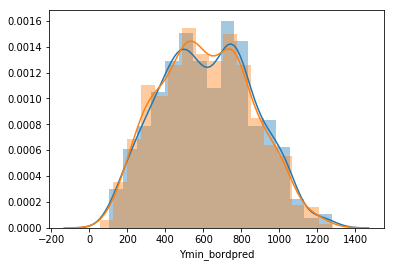

In [51]:
sns.distplot(datta.Ymin_true)
sns.distplot(datta.Ymin_bordpred);

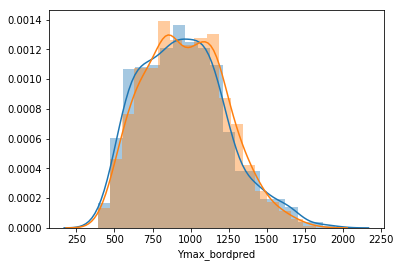

In [48]:
sns.distplot(datta.Ymax_true)
sns.distplot(datta.Ymax_bordpred);

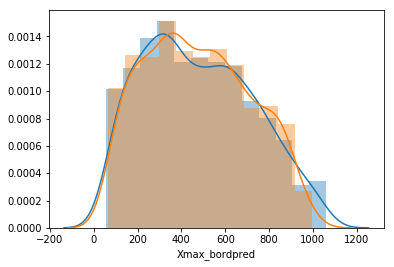

In [50]:
sns.distplot(datta.Xmax_true)
sns.distplot(datta.Xmax_bordpred);

In [197]:
test_data.Xmax_true = sub5.Xmax_true

In [254]:
test.Xmax.mean()

424.0710926694329

In [255]:
sub5.Xmax_true = test_data.Xmax_true / 88577251128426.0

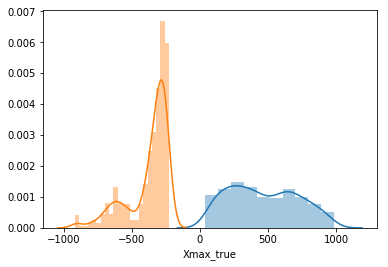

In [262]:
sns.distplot(sub5.Xmax_true)
sns.distplot(test_data.Xmax_true / 88577251128426.0)

In [273]:
data.corr().Ymin_true

itemId        -0.010904
Xmin_true      0.040840
Ymin_true      1.000000
Xmax_true     -0.242092
Ymax_true      0.707417
Xmax_bord     -0.223218
Xmin_bord      0.141091
Ymax_bord      0.688825
Ymin_bord      0.977532
bord_square   -0.253151
X_mean        -0.181143
Y_mean         0.900767
true_square   -0.221070
height        -0.261253
weight        -0.266440
max_X-Y       -0.892757
min_X-Y       -0.957527
Ymax2          0.680266
Xmax2          0.680266
Ymin2          0.976164
Xmin2         -0.042702
Name: Ymin_true, dtype: float64

In [111]:
sub5 = test.groupby("itemId")[['Xmin']].mean().reset_index().merge(sub5, on = ['itemId'])

In [ ]:
test.groupby("itemId")[['Xmin', 'Xmax']].mean().reset_index().Xmin

In [99]:
sub5.shape

(630, 7)

In [92]:
sub5.xmin_mean.isna().sum()

606

AttributeError: 'DataFrame' object has no attribute 'pred_xmin'

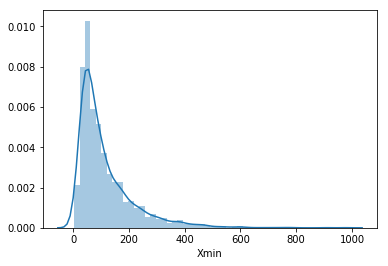

In [191]:
sns.distplot(test.Xmin)
sns.distplot(sub5.pred_xmin)
plt.xlim([-150, 250]);

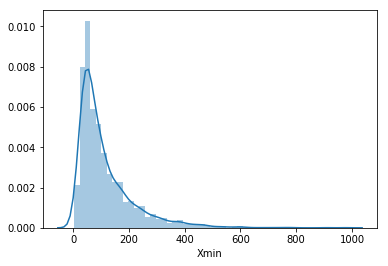

In [81]:
sns.distplot(test.Xmin)

In [72]:
sub5.pred_xmin.mean()

99.20951105739165

(-150, 250)

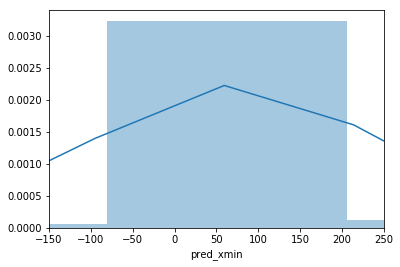

In [78]:
sns.distplot(sub5.pred_xmin)
plt.xlim([-150, 250])

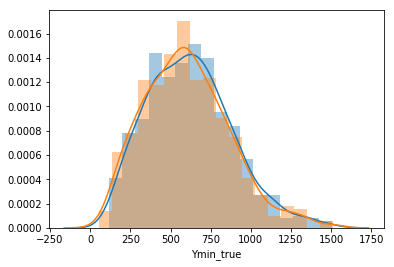

In [815]:
sns.distplot(sub5.Ymin_true)
sns.distplot(qu.Ymin_true)

In [50]:
sub5['pred_square'] = model.predict(sub5[['Ymin_true', 'Xmax_true', 'Ymax_true']])

In [51]:
sub5['pred_xmin'] = sub5.Xmax_true - sub5.pred_square / (sub5.Ymax_true - sub5.Ymin_true)

In [55]:
sub5.head()

,Xmin_true,Ymin_true,Xmax_true,Ymax_true,pred_square,pred_xmin
18,77.732082,643.482742,729.108808,1112.907586,293721.706424,103.403309
19,58.607804,570.177553,126.413291,717.387702,11342.537366,49.363322
33,65.735944,395.222502,402.064729,641.816905,86301.188189,52.092519
62,74.428797,829.189221,612.307351,1240.494645,210082.618147,101.536995
114,66.605229,580.928981,217.051221,767.441087,23295.736279,92.149215


In [54]:
sub5[['pred_xmin', 'Ymin_true', 'Xmax_true', 'Ymax_true']].head()

,pred_xmin,Ymin_true,Xmax_true,Ymax_true
18,103.403309,643.482742,729.108808,1112.907586
19,49.363322,570.177553,126.413291,717.387702
33,52.092519,395.222502,402.064729,641.816905
62,101.536995,829.189221,612.307351,1240.494645
114,92.149215,580.928981,217.051221,767.441087


In [48]:
data.corr()

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true,pred_square,true_square,pred_xmin
userId,1.000000,-0.056443,-0.027171,-0.026347,-0.011755,-0.019156,-0.008108,-0.021398,-0.010120,-0.018741,-0.002013,-0.002089,-0.009318
itemId,-0.056443,1.000000,-0.005879,-0.035163,-0.004292,-0.035587,-0.018052,-0.039277,-0.001474,-0.034327,-0.027749,-0.027681,-0.017374
Xmin,-0.027171,-0.005879,1.000000,0.118429,0.408444,0.179791,0.253954,0.035147,0.443373,0.297514,0.360038,0.360117,0.255188
Ymin,-0.026347,-0.035163,0.118429,1.000000,-0.161171,0.744054,0.021584,0.959956,-0.157285,0.743446,-0.112190,-0.112330,0.019935
Xmax,-0.011755,-0.004292,0.408444,-0.161171,1.000000,0.420612,0.309662,-0.189167,0.884486,0.421888,0.773184,0.772670,0.304722
Ymax,-0.019156,-0.035587,0.179791,0.744054,0.420612,1.000000,0.146372,0.724746,0.382403,0.922051,0.387391,0.386923,0.141514
Xmin_true,-0.008108,-0.018052,0.253954,0.021584,0.309662,0.146372,1.000000,0.043700,0.287298,0.106737,-0.020202,-0.020859,0.993677
Ymin_true,-0.021398,-0.039277,0.035147,0.959956,-0.189167,0.724746,0.043700,1.000000,-0.222574,0.706799,-0.202872,-0.203168,0.040301
Xmax_true,-0.010120,-0.001474,0.443373,-0.157285,0.884486,0.382403,0.287298,-0.222574,1.000000,0.425313,0.874065,0.873689,0.283879
Ymax_true,-0.018741,-0.034327,0.297514,0.743446,0.421888,0.922051,0.106737,0.706799,0.425313,1.000000,0.499706,0.499539,0.105131


In [31]:
lin = LinearRegression()
tx, vx, ty, vy = train_test_split(data.pred_square, data.true_square, test_size = 0.2)
lin.fit(tx.values.reshape(-1, 1), ty)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lin.coef_[0]

0.6100514327767158

In [33]:
k = lin.coef_[0]

In [14]:
(data.true_square / data.pred_square).mean()

0.5417868430144528

In [36]:
(data['pred_square']*k - data.true_square).mean()

3342.7169928818507

In [24]:
data['pred_xmin'] = (data.Xmax_true*(data.Ymax_true - data.Ymin_true) -  k * data.Xmax_true**2) / (data.Ymax_true - data.Ymin_true)

In [26]:
data['pred_xmin'] = data.Xmax_true - data.true_square / (data.Ymax_true - data.Ymin_true)

In [47]:
data['pred_xmin'] = data.Xmax_true - data.pred_square / (data.Ymax_true - data.Ymin_true)

In [203]:
sub19 = pd.read_csv('submission19.csv', names = ['Xmin_true','Ymin_true', 'Xmax_true','Ymax_true'])

In [260]:
sub5.Xmin_true.mean()

83.77844415745018

In [261]:
sub5.Xmax_true.mean()

464.6554777600302

In [112]:
def minimax(state, depth, player):
	if player == MAX:
		best = [-1, -1, -infinity]
	else:
		best = [-1, -1, +infinity]

	if depth == 0 or game_over(state):
		score = evaluate(state)
		return [-1, -1, score]

	for cell in empty_cells(state):
		x, y = cell[0], cell[1]
		state[x][y] = player
		score = minimax(state, depth - 1, -player)
		state[x][y] = 0
		score[0], score[1] = x, y

		if player == MAX:
			if score[2] > best[2]:
				best = score
		else:
			if score[2] < best[2]:
				best = score

	return best

In [242]:
dt.columns

Index(['userId', 'itemId', 'Xmin', 'Ymin', 'Xmax', 'Ymax', 'Xmin_true',
       'Ymin_true', 'Xmax_true', 'Ymax_true'],
      dtype='object')

In [250]:
lin.fit(dt[dt.userId == 1164].Xmin.values.reshape(-1, 1), dt[dt.userId == 1164].Xmin_true)\
.predict(dt[dt.userId == 1164].Xmin.values.reshape(-1, 1))

array([ 18.85955222,  61.6242451 , 188.51620268])

In [251]:
dt[dt.userId == 1164]

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,1164,6132,62,656,276,803,47,650,213,812
1580,1164,6171,123,451,843,848,24,258,1029,1226
2430,1164,5778,304,856,615,1139,198,815,581,1198


In [232]:
data.Ymax_true.max()

1949

In [237]:
data['true_square'] = (data.Xmax_true - data.Xmin_true)*(data.Ymax_true - data.Ymin_true)

In [246]:
test_data['true_square'] = (test_data.Xmax_bord - test_data.Xmin_bord)*(test_data.Ymax_bord - test_data.Ymin_bord)

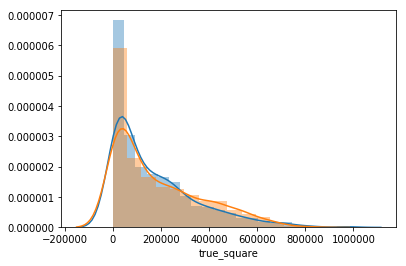

In [248]:
sns.distplot(data['true_square'])
sns.distplot(test_data['true_square'])

In [243]:
data = data.sort_values(by=['true_square'])

In [21]:
data.true_square.max()

977130

In [243]:
datta['weight'] = datta.Xmax_bord - datta.Xmin_bord

In [244]:
datta['height'] = datta.Ymax_bord - datta.Ymin_bord

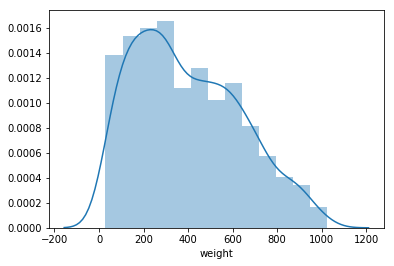

In [55]:
sns.distplot(data['weight'])

In [67]:
ttest_data[['itemId', 'Xmin_bordpred','Ymin_bord', 'Xmax_bord', 'Ymax_bord']].head()

,itemId,Xmin_bordpred,Ymin_bord,Xmax_bord,Ymax_bord
0,18,81.062826,634,764,1132
1,19,34.048266,559,119,729
2,33,31.198899,380,414,652
3,62,37.847423,824,639,1262
4,114,40.696790,570,216,780


In [10]:
sub39 = pd.read_csv('submission39data1.csv')

In [447]:
sub39 = sub39.drop(columns = ['Unnamed: 0'])

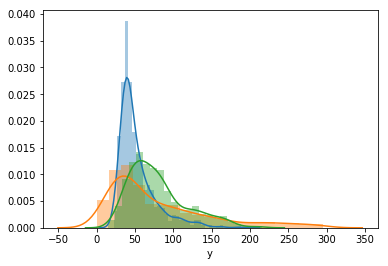

In [459]:
sns.distplot(sub39.Xmin_bordpred)
sns.distplot(sub39.Xmin_true)
sns.distplot(datta.y);

In [22]:
datta[datta.height > datta.weight].shape

(194, 17)

In [30]:
datta['hmore'] = (datta.Ymax_bord - datta.Ymin_bord) > (datta.Xmax_bord - datta.Xmin_bord)

In [35]:
datta['hmore'] = datta['hmore'].map({True: 1, False:0})

In [36]:
datta.hmore.value_counts()

0    706
1    161
Name: hmore, dtype: int64

In [104]:
dt["iou"] = dt[['Xmin','Ymin', 'Xmax', 'Ymax', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [109]:
dt = dt[dt.iou > 0.3]

In [110]:
data = dt